In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] =  16
mpl.rcParams['ytick.labelsize'] =  16

In [53]:
Doctors_pats = pd.read_csv('Statistics_per_work_day_Fachgebietsgruppe_district_ALL_patients.csv', sep=';')
Doctors_pats.sample(10)

,Leistungserbringer_ID,weekday,GC_Z_District,Fachgebietsgruppe,N_wday,N_pat,avg_num_pat_per_wday
52993,1924652207,1,91701,URO,1,1,1.000000
51324,995508401,7,40905,GGH,1,7,7.000000
15931,469792255,5,30740,AM,45,4459,99.088889
51914,1834749273,5,70926,GGH,3,8,2.666667
4170,1037379178,4,61247,AM,46,1112,24.173913
6729,610583532,2,70354,AM,42,4396,104.666667
15464,67697366,5,31109,AM,45,1985,44.111111
14647,1550898993,5,90201,AM,45,1891,42.022222
7643,676338214,5,31802,AM,46,7917,172.108696
26683,1118452859,4,31021,AM,27,53,1.962963


In [62]:
gem = pd.read_excel('gemliste_knz.xls', skiprows=3, skipfooter=2)
gem['Gemeinde kennziffer'] = gem['Gemeinde kennziffer'].astype('int64')
gem.sample(10)

,Gemeinde kennziffer,Gemeindename,Gemeinde code,Status,PLZ des Gem.Amtes,weitere Postleitzahlen
292,20923,Wolfsberg,20923,ST,9400,9411 9412 9413 9421 9431 9433 9441 9461 9462
1438,60326,Sankt Josef (Weststeiermark),60326,NaN,8503,8143
914,40436,St. Johann am Walde,40436,NaN,5242,5241 5251
1820,70412,Kössen,70412,NaN,6345,NaN
1326,50212,Scheffau am Tennengebirge,50212,NaN,5440,5441
229,20613,Kleblach-Lind,20613,NaN,9753,NaN
44,10420,Großmürbisch,10420,NaN,7540,NaN
1594,61727,Ludersdorf-Wilfersdorf,61727,NaN,8200,8063
853,32502,Arbesbach,32502,M,3925,3920
1404,50515,Zederhaus,50515,NaN,5584,NaN


In [63]:
print('Number of entries before join: ', len(Doctors_pats))
Doctors_pats = Doctors_pats.merge(gem[['Gemeinde kennziffer', 'Gemeindename']], left_on='GC_Z_District', 
                   right_on='Gemeinde kennziffer', how='left')
print('Number of entries after join: ', len(Doctors_pats))
Doctors_pats.sample(10)

Number of entries before join:  56518
Number of entries after join:  56518


,Leistungserbringer_ID,weekday,GC_Z_District,Fachgebietsgruppe,N_wday,N_pat,avg_num_pat_per_wday,Gemeinde kennziffer,Gemeindename
12281,1905469336,6,20807,AM,52,2175,41.826923,20807.0,Globasnitz
5108,148831941,1,62379,AM,7,210,30.000000,62379.0,Feldbach
14354,2066009047,5,31301,AM,48,4201,87.520833,31301.0,Aggsbach
54958,1200346528,6,41019,AM,1,1,1.000000,41019.0,Pucking
10087,884008053,6,40101,AM,37,2220,60.000000,40101.0,Linz
27927,1592061941,3,40101,GGH,43,1229,28.581395,40101.0,Linz
40210,1144964312,1,20530,AM,19,71,3.736842,20530.0,Straßburg
39172,568799035,4,91001,ORTR,5,158,31.600000,NaN,NaN
15941,167684138,5,91001,AM,44,2059,46.795455,NaN,NaN
30070,390387129,4,80303,AM,43,2259,52.534884,80303.0,Lustenau


In [3]:
Doctors_pats['Fachgebietsgruppe'].unique()

array(['URO', 'ORTR', 'AM', 'GGH', 'DER', 'HNO', 'RAD', 'AU', 'KI', 'IM',
       'NEU', 'PSY', 'CH'], dtype=object)

In [4]:
Doctors_pats['avg_num_pat_per_wday'].max()

1111.23076923077

In [5]:
Doctors_pats['avg_num_pat_per_wday'].min()

1.0

Text(0.5, 0, 'Mean number of visits per day')

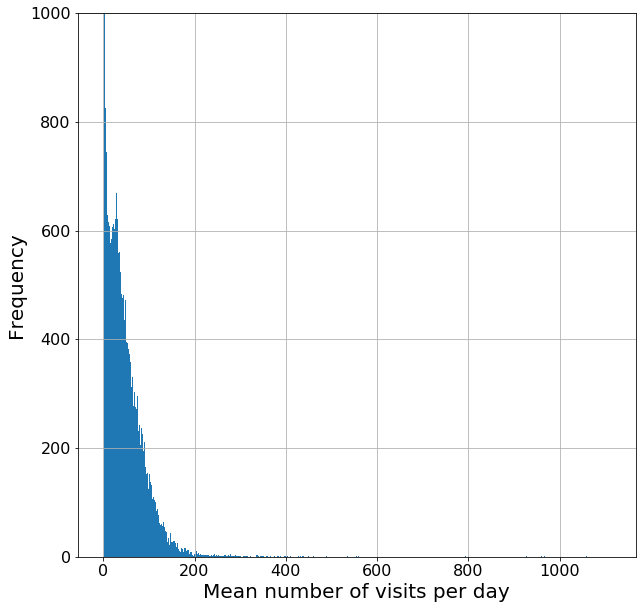

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
Doctors_pats['avg_num_pat_per_wday'].hist(bins=np.arange(1112), ax=ax)
ax.set_ylim([0,1000])
ax.set_ylabel('Frequency', fontsize = 20)
ax.set_xlabel('Mean number of visits per day', fontsize=20)

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f87ca3364d0>>

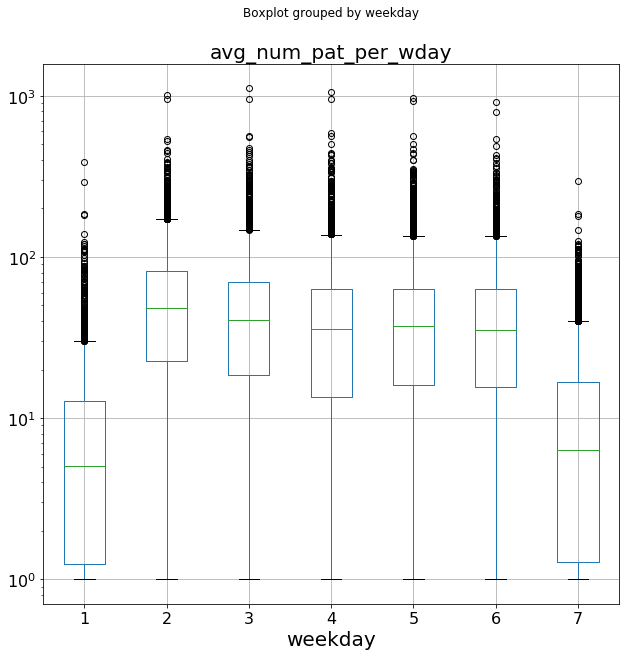

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
Doctors_pats.boxplot(column='avg_num_pat_per_wday', by='weekday', ax=ax)
ax.set_yscale('log')
ax.set

In [8]:
Doctors_pats[Doctors_pats['Leistungserbringer_ID'] == 459990056]

,Leistungserbringer_ID,weekday,GC_Z_District,Fachgebietsgruppe,N_wday,N_pat,avg_num_pat_per_wday
0,459990056,6,62140,URO,41,307,7.487805
2,459990056,4,62140,URO,43,239,5.558140
5,459990056,3,62140,URO,43,280,6.511628
6,459990056,5,62140,URO,42,338,8.047619
7,459990056,2,62140,URO,41,283,6.902439


In [9]:
Doctors_pats[Doctors_pats['Leistungserbringer_ID'] == 1815205814]

,Leistungserbringer_ID,weekday,GC_Z_District,Fachgebietsgruppe,N_wday,N_pat,avg_num_pat_per_wday
1,1815205814,5,62140,ORTR,40,242,6.050000
3,1815205814,3,62140,ORTR,43,384,8.930233
4,1815205814,4,62140,ORTR,44,379,8.613636
8,1815205814,6,62140,ORTR,25,83,3.320000
9,1815205814,7,62140,ORTR,17,37,2.176471
41875,1815205814,1,62140,ORTR,18,44,2.444444
43508,1815205814,2,62140,ORTR,26,64,2.461538


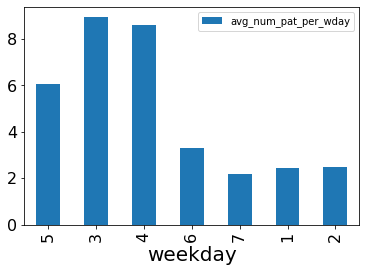

In [10]:
Doctors_pats[Doctors_pats['Leistungserbringer_ID'] == 1815205814].plot(kind='bar', y='avg_num_pat_per_wday', x='weekday')

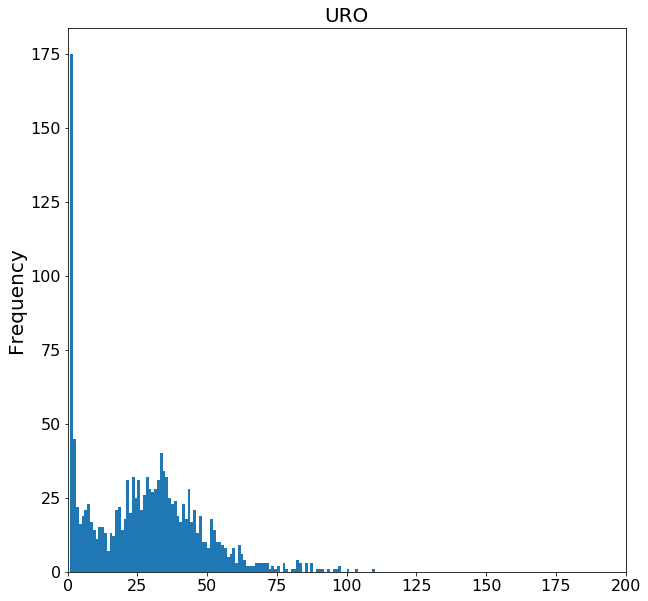

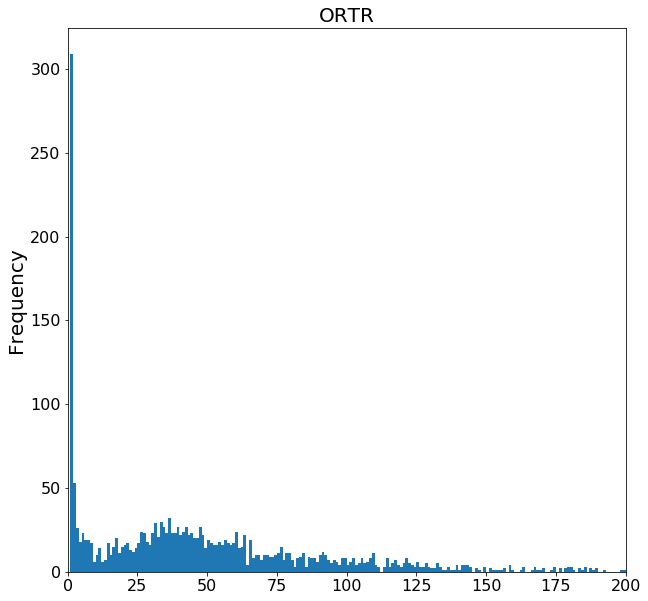

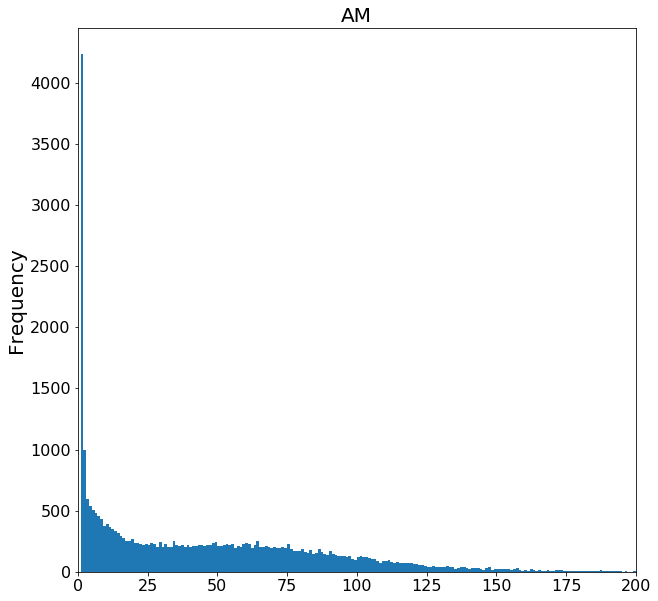

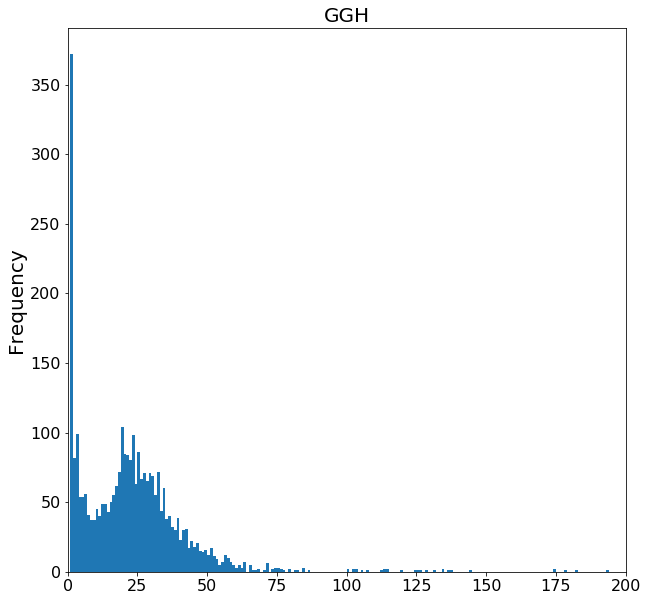

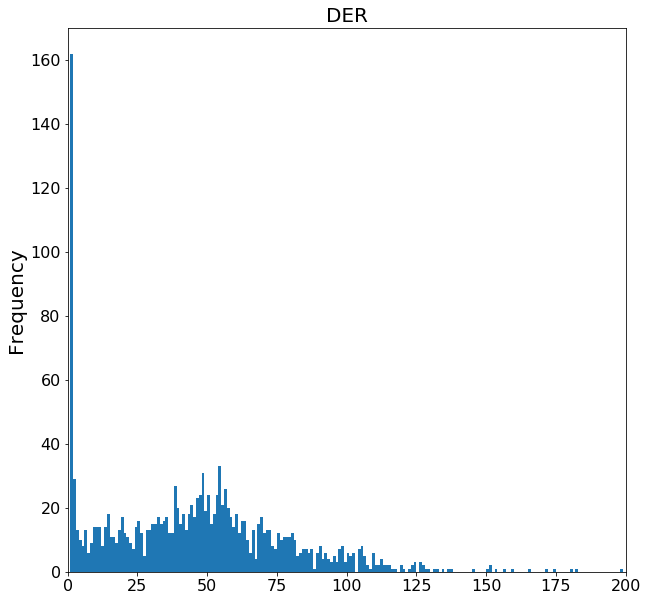

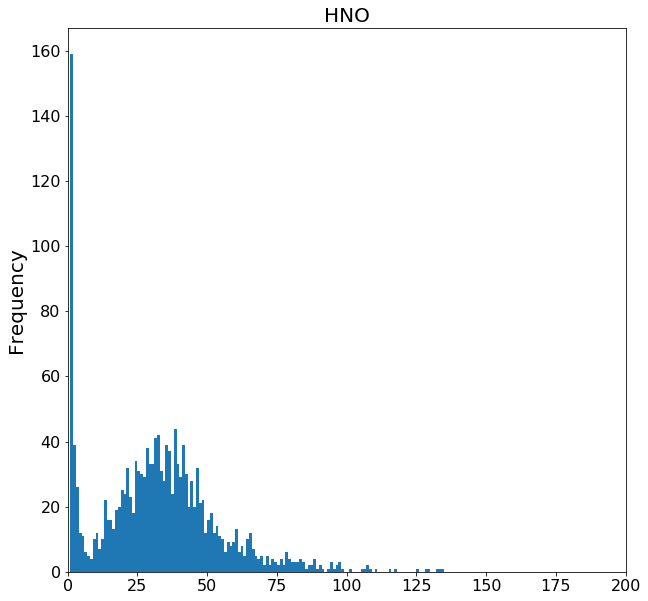

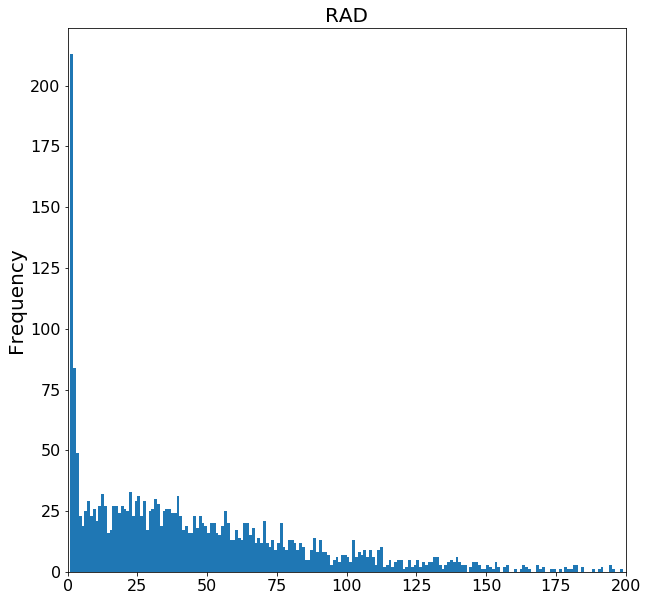

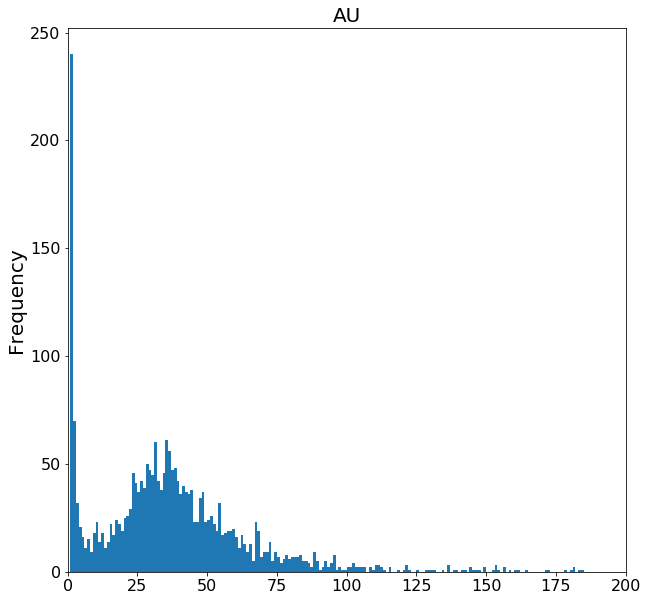

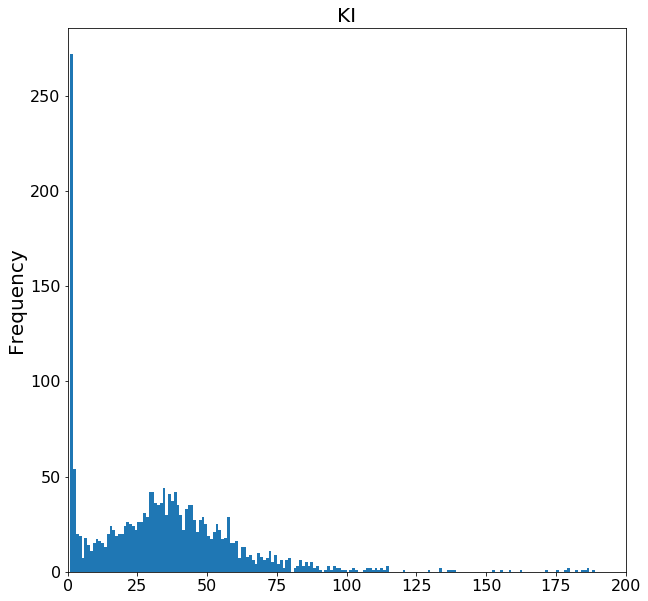

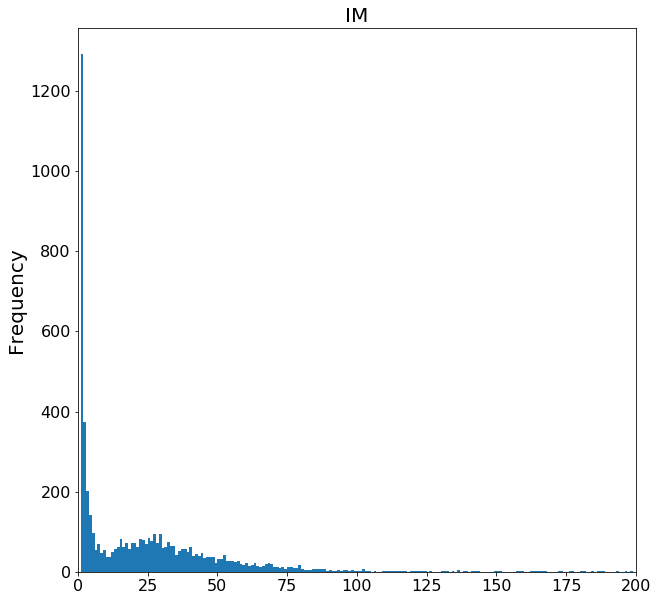

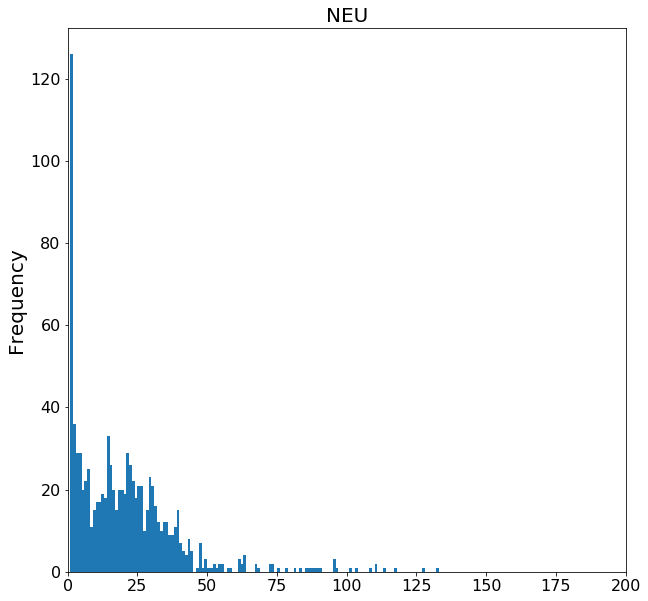

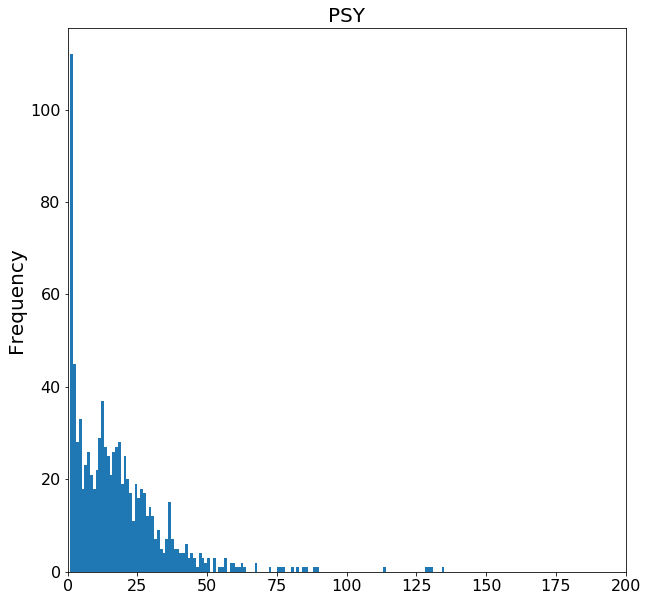

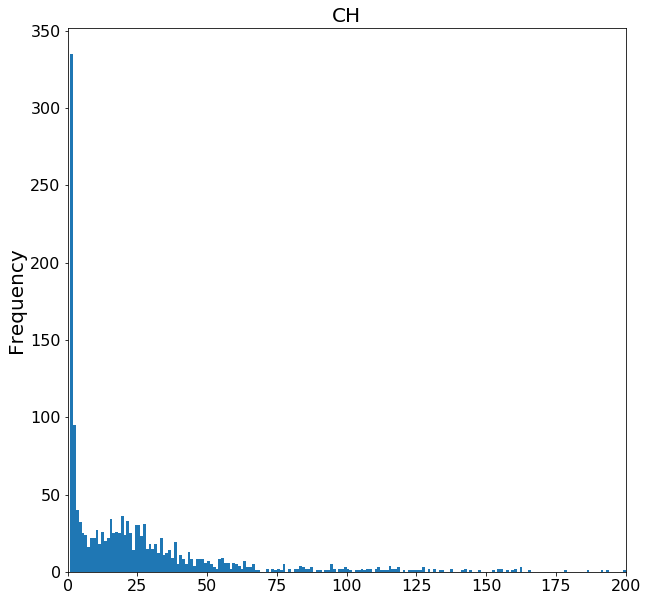

In [64]:
Specialization_dataframe_dic = {}
for spec in Doctors_pats['Fachgebietsgruppe'].unique():
    Specialization_dataframe_dic[spec] = Doctors_pats[Doctors_pats['Fachgebietsgruppe'] == spec]
    fig, ax = plt.subplots(figsize=(10,10))
    M = Specialization_dataframe_dic[spec]['avg_num_pat_per_wday'].max()
    Specialization_dataframe_dic[spec]['avg_num_pat_per_wday'].plot(kind='hist', bins=np.arange(M), ax=ax)
    ax.set_xlim([0,200])
    ax.set_title(spec)
    plt.show()

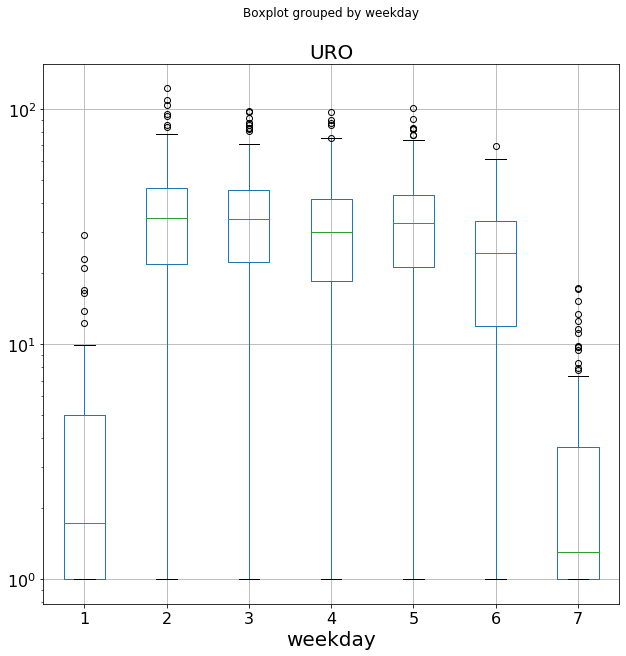

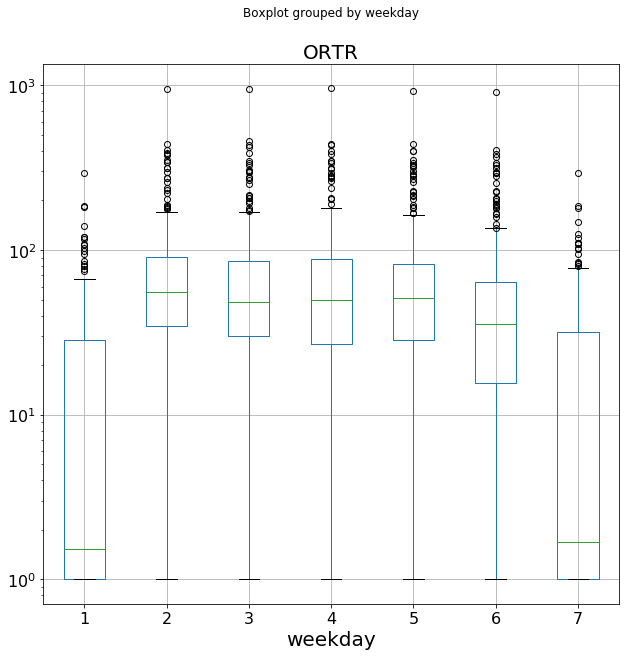

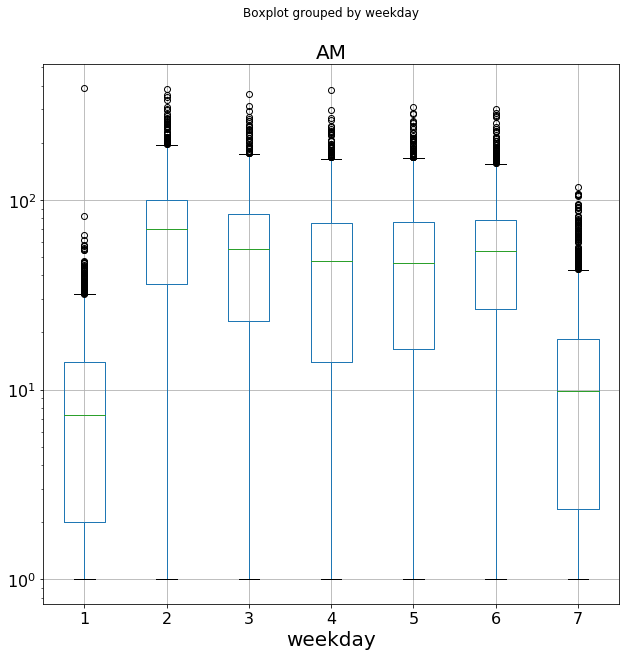

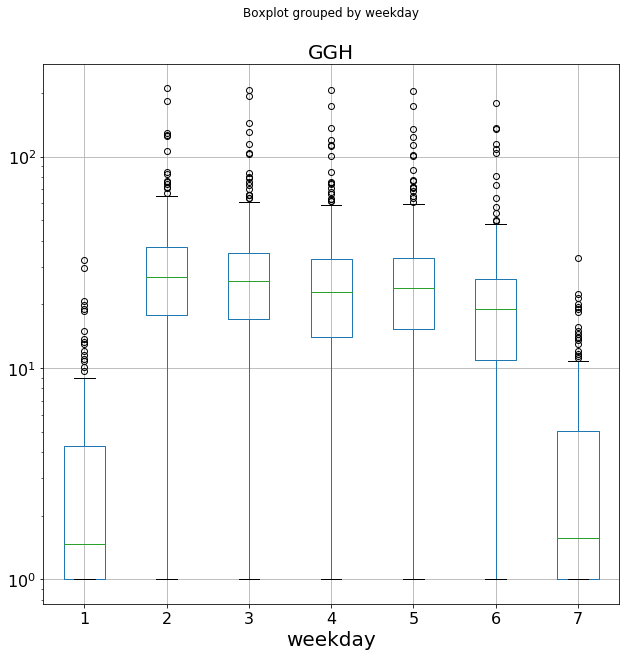

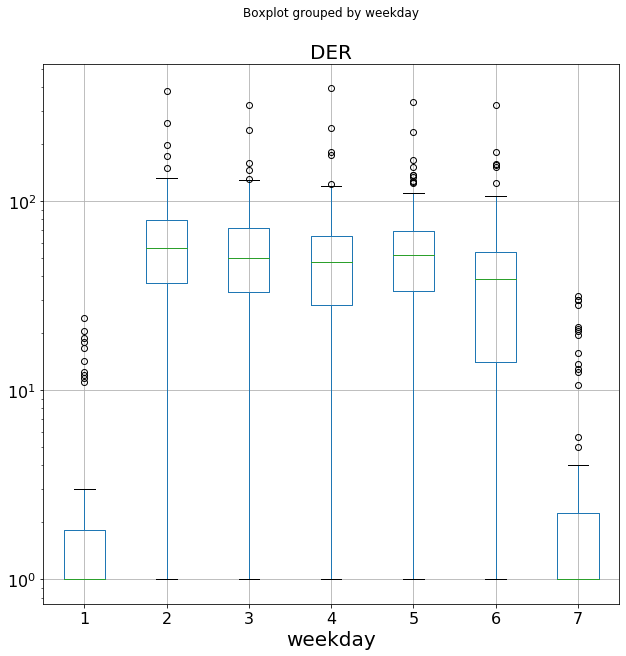

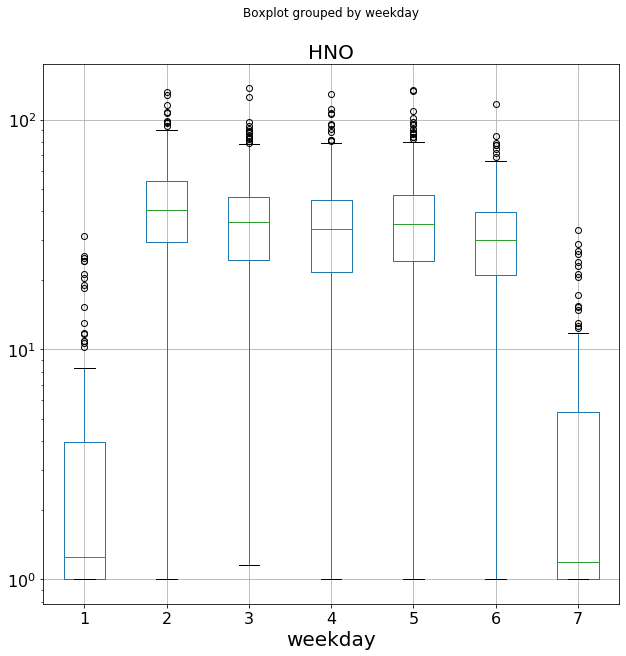

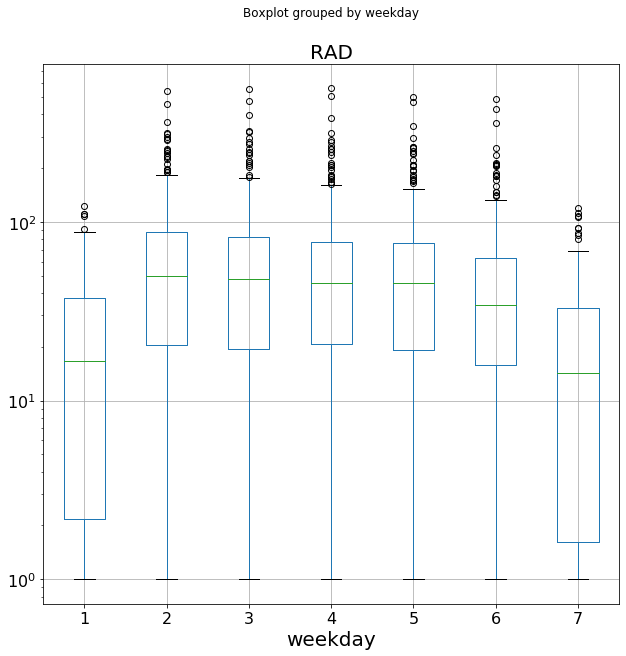

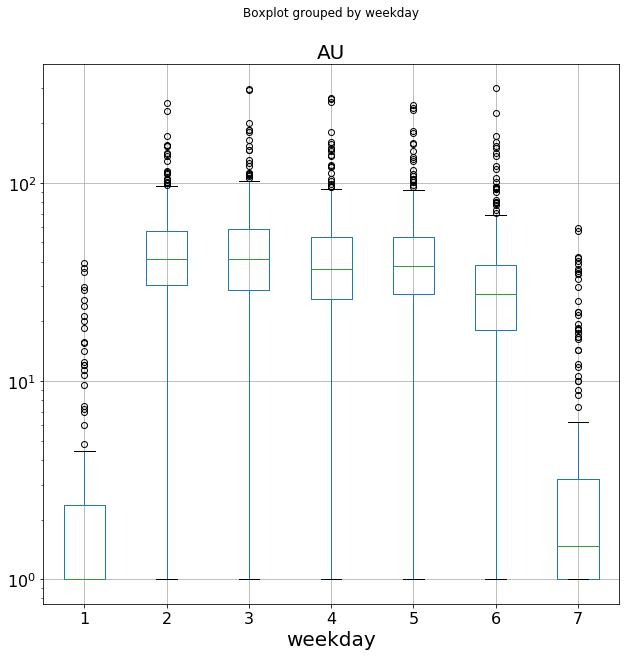

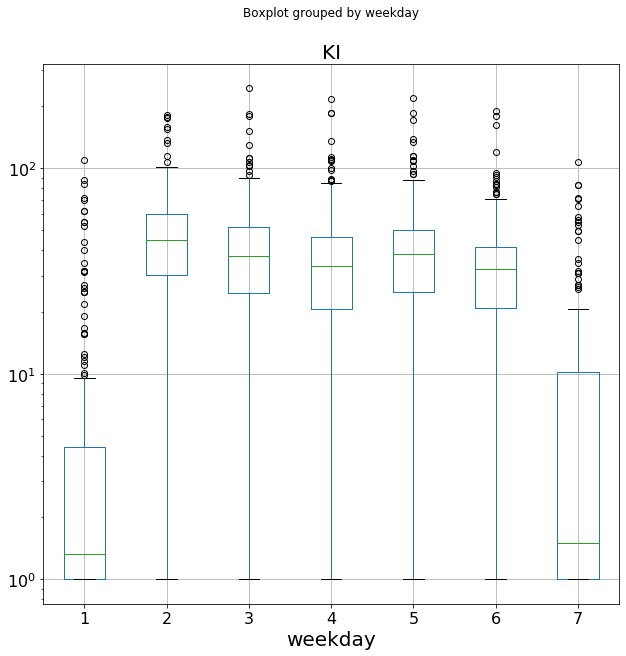

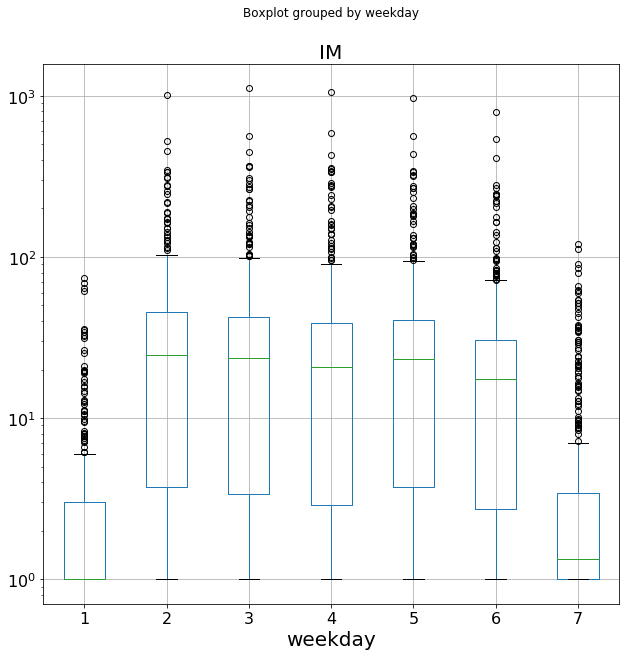

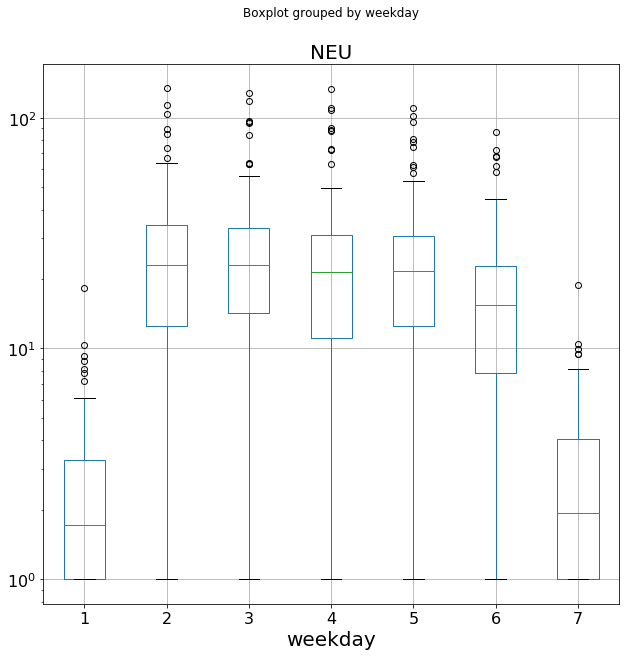

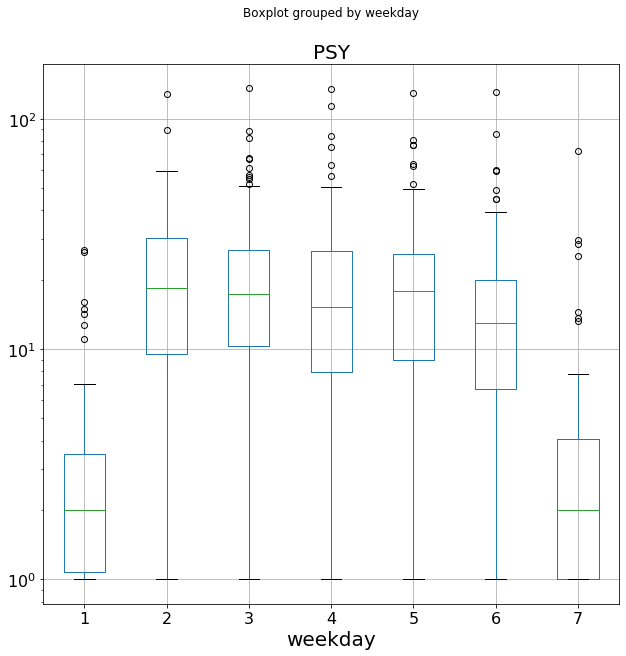

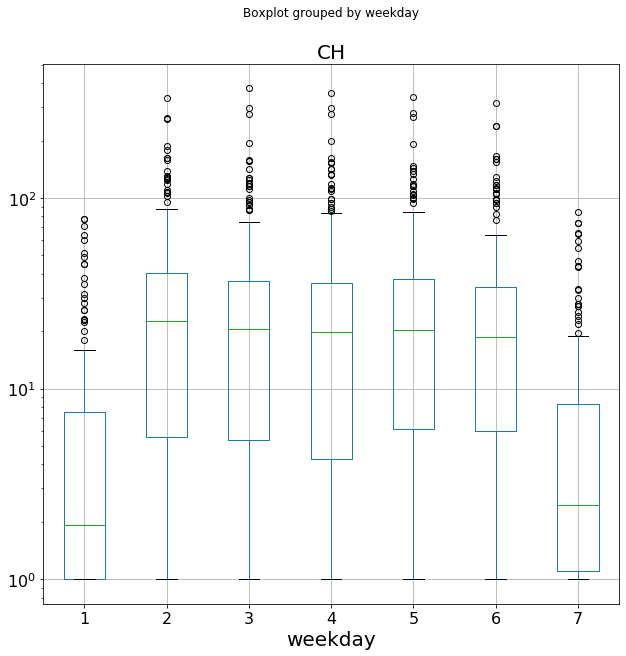

In [65]:
for spec in Specialization_dataframe_dic.keys():
    fig, ax = plt.subplots(figsize=(10,10))
    Specialization_dataframe_dic[spec].boxplot(column='avg_num_pat_per_wday', by='weekday', ax=ax)
    ax.set_yscale('log')
    ax.set_title(spec)
    plt.show()

In [66]:
for spec in Specialization_dataframe_dic.keys():
    print('Number of ', spec, ' in Austria',
          len(Specialization_dataframe_dic[spec]['Leistungserbringer_ID'].unique()))

Number of  URO  in Austria 247
Number of  ORTR  in Austria 363
Number of  AM  in Austria 4894
Number of  GGH  in Austria 550
Number of  DER  in Austria 289
Number of  HNO  in Austria 291
Number of  RAD  in Austria 419
Number of  AU  in Austria 431
Number of  KI  in Austria 335
Number of  IM  in Austria 1050
Number of  NEU  in Austria 164
Number of  PSY  in Austria 160
Number of  CH  in Austria 277


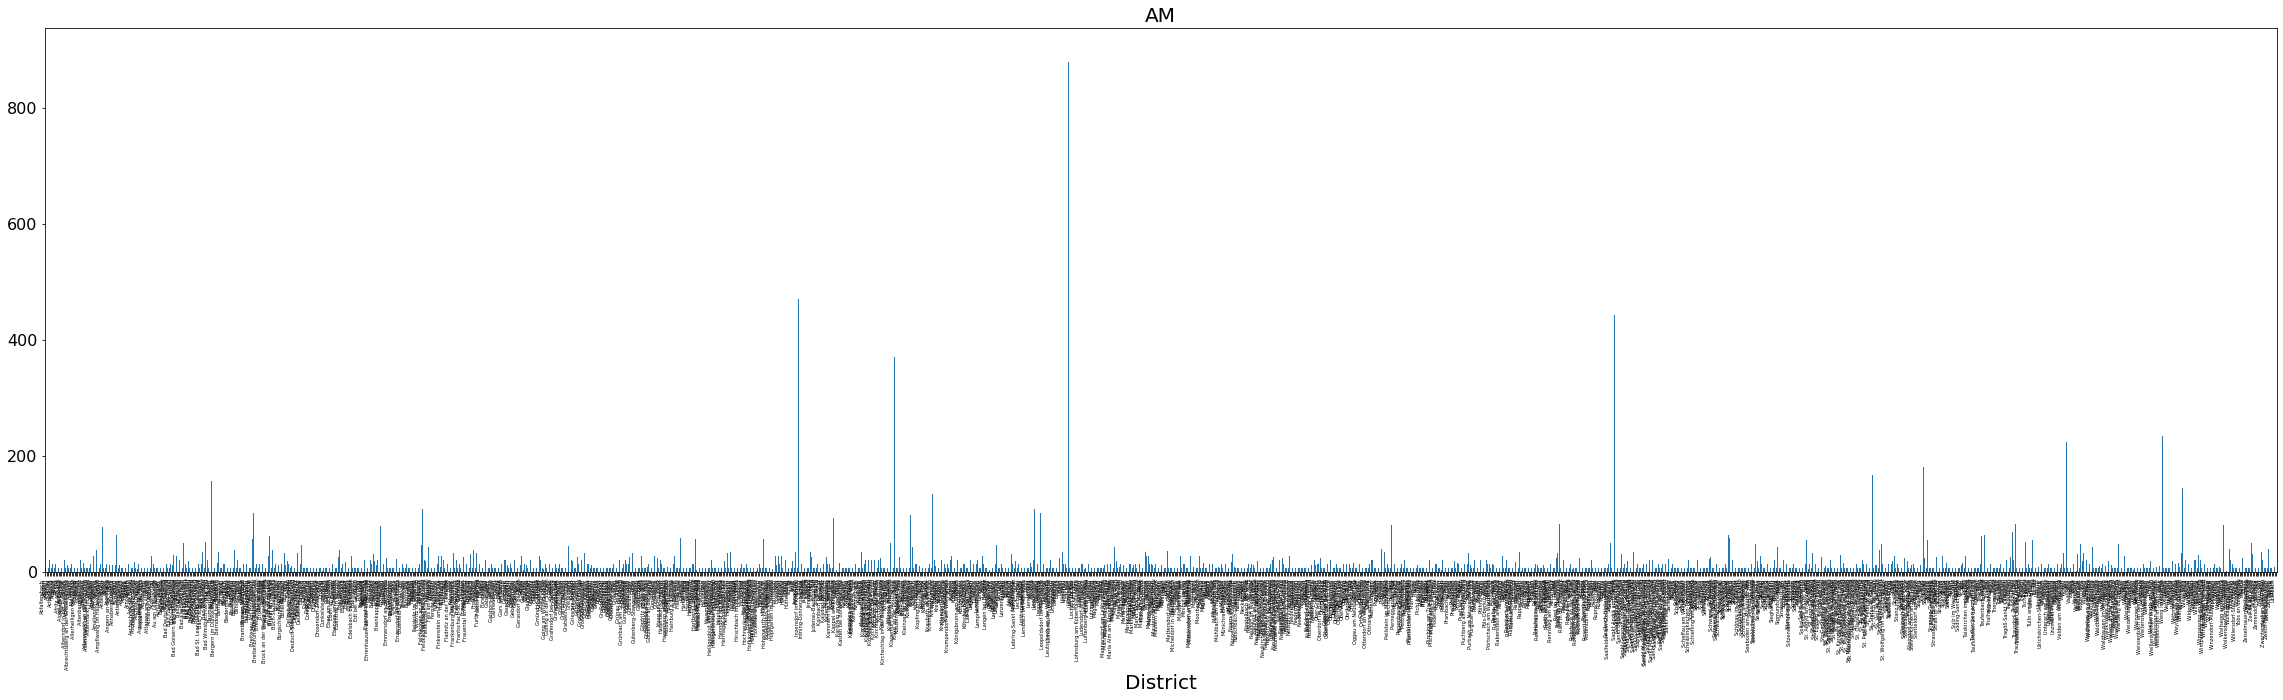

In [71]:
spec = 'AM'
fig, ax = plt.subplots(figsize=(40,10))
Specialization_dataframe_dic[spec].groupby('Gemeindename').count()['Leistungserbringer_ID'].plot(kind='bar', ax=ax)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 5)
ax.set_title(spec)
ax.set_xlabel('District')
plt.show()

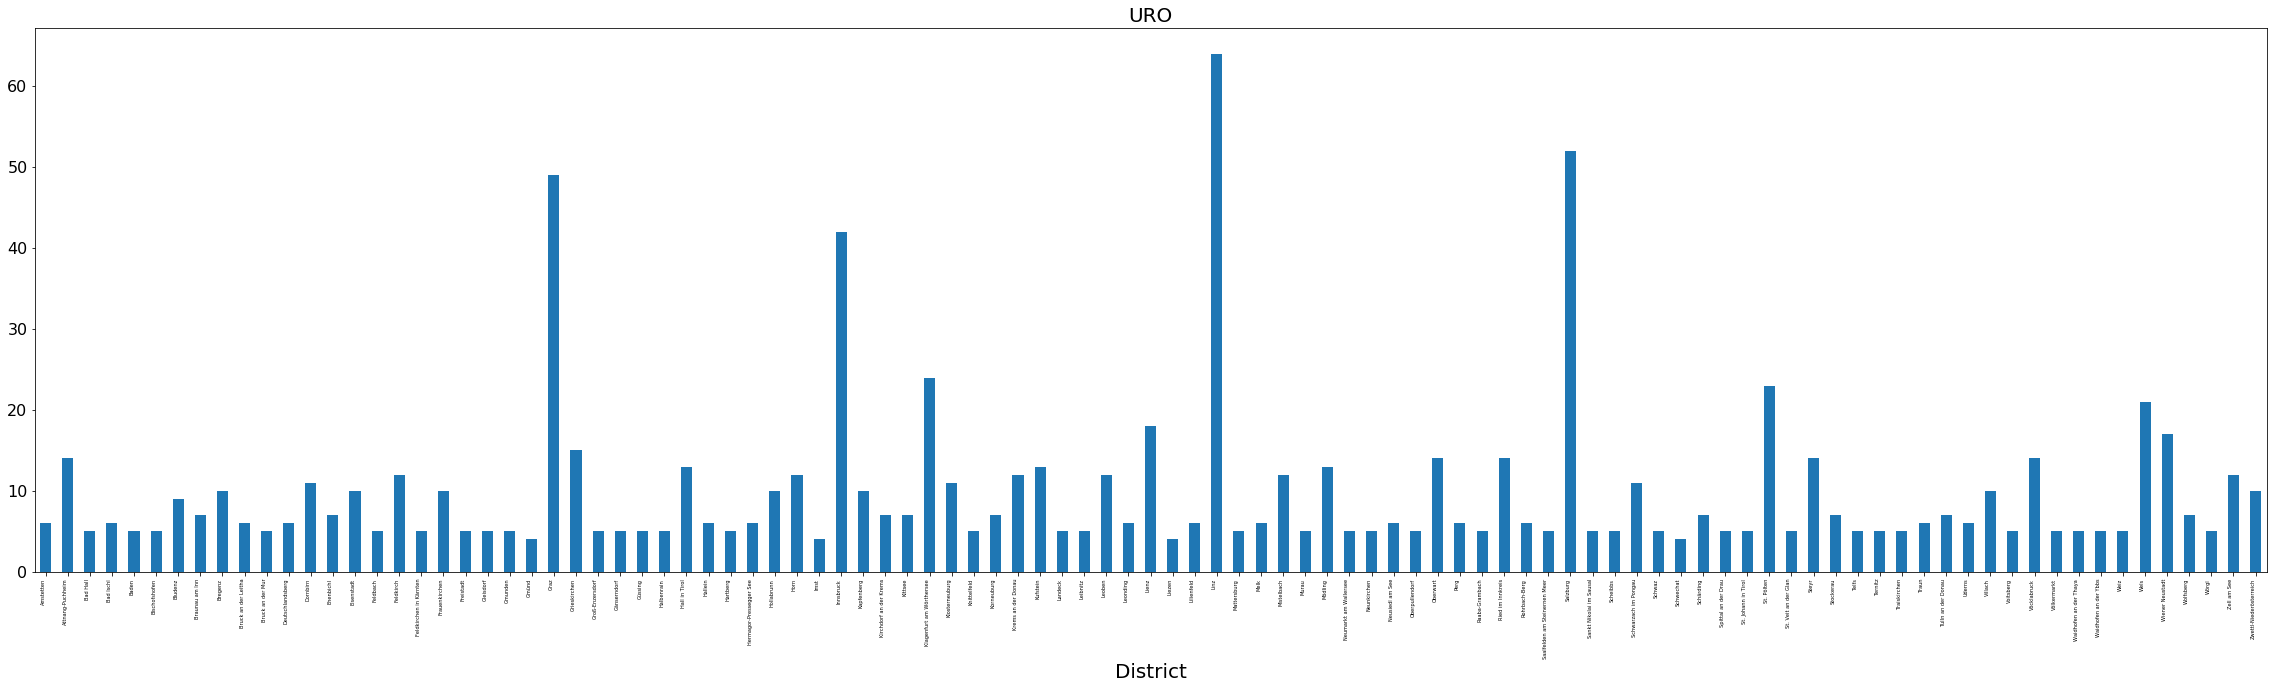

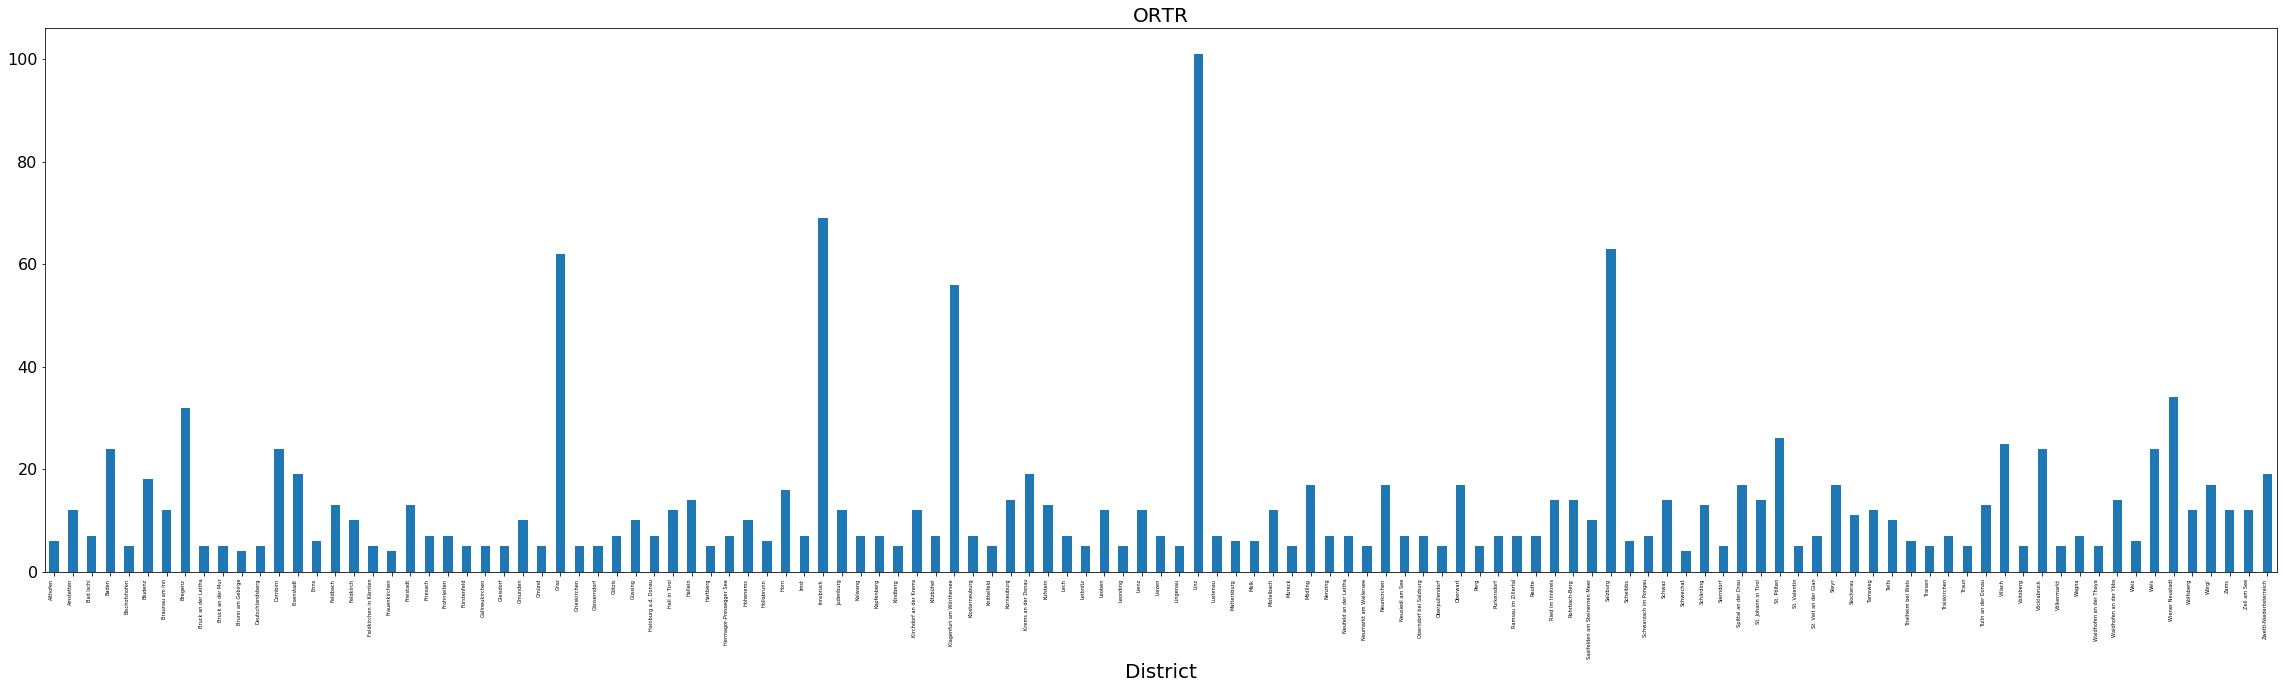

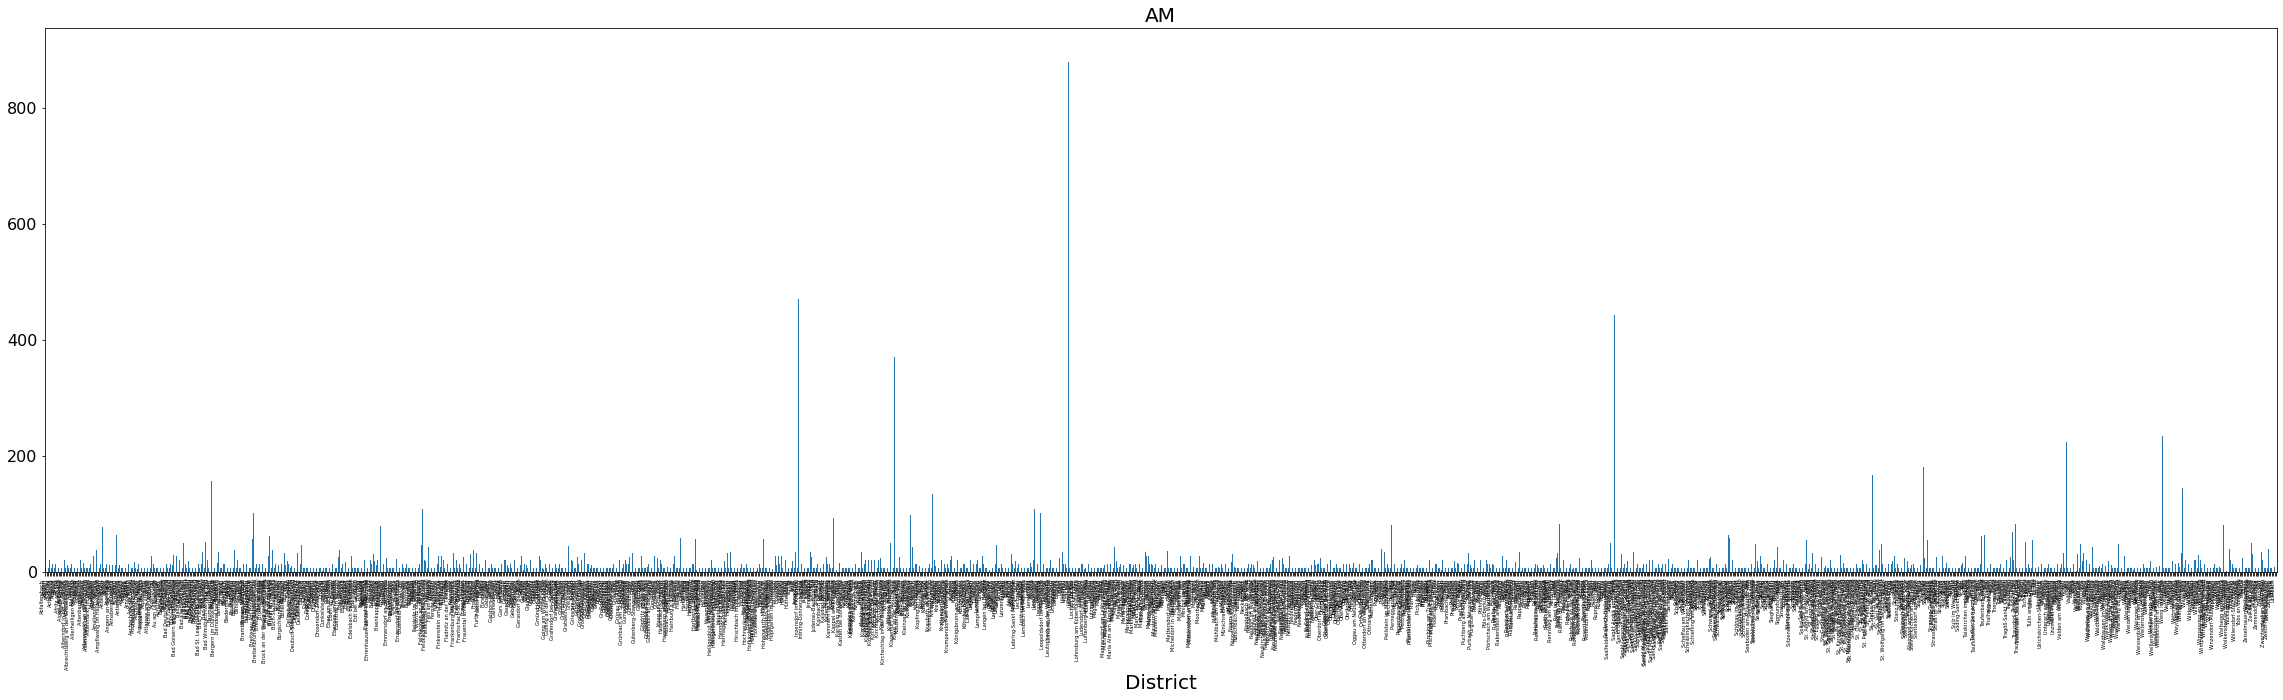

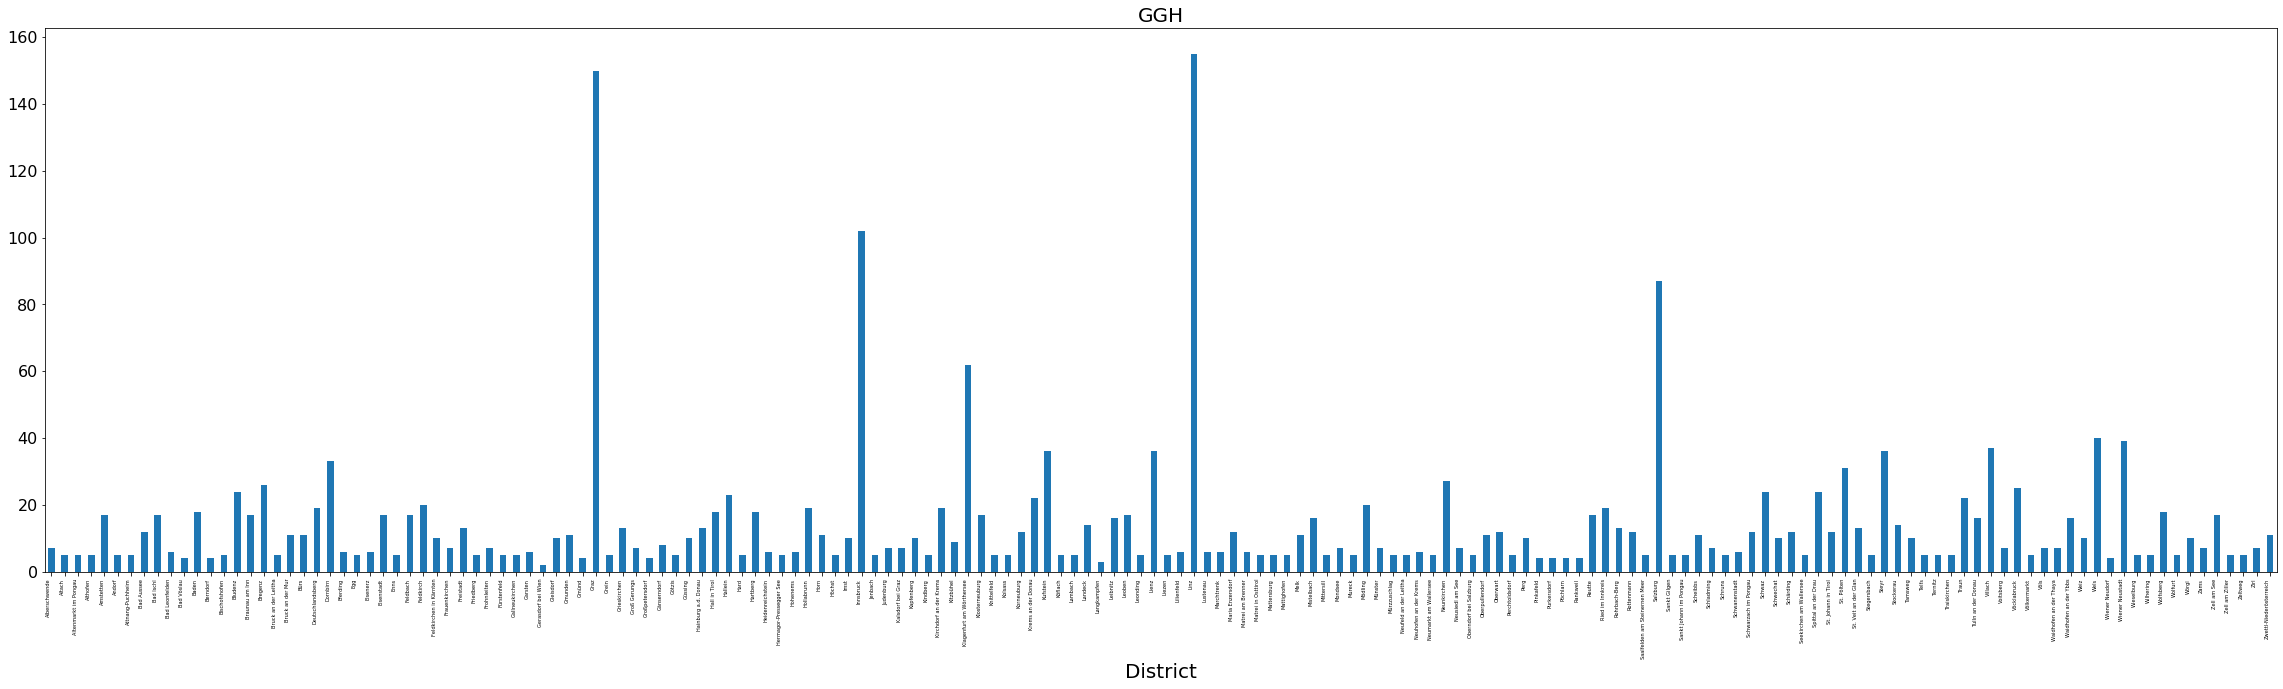

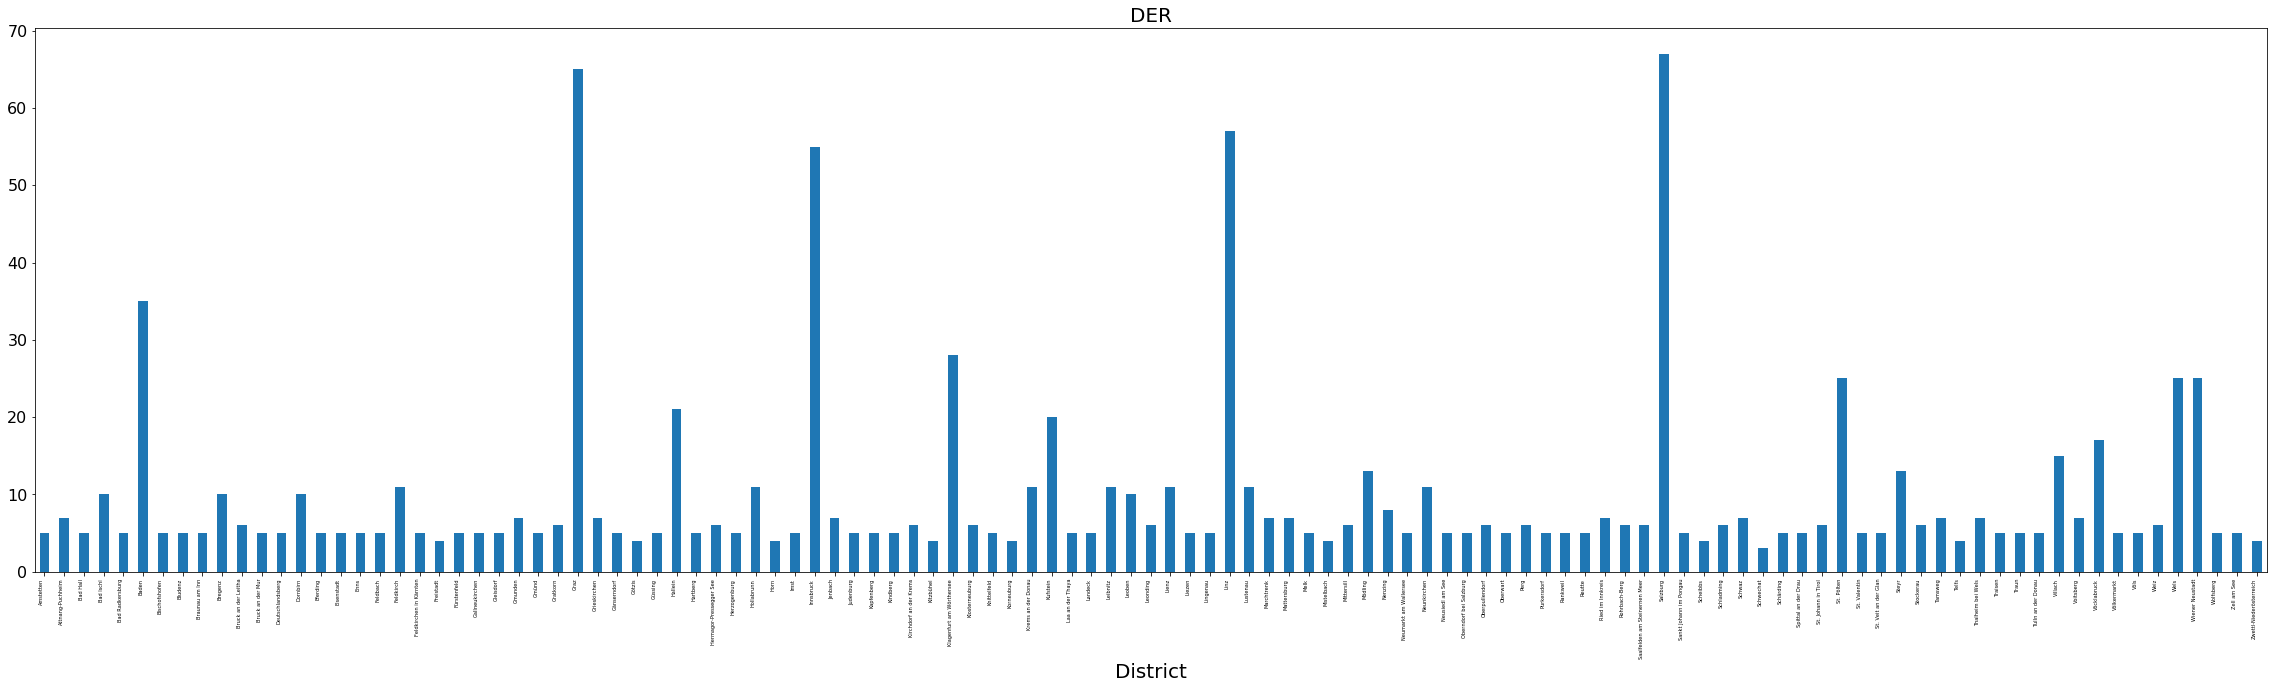

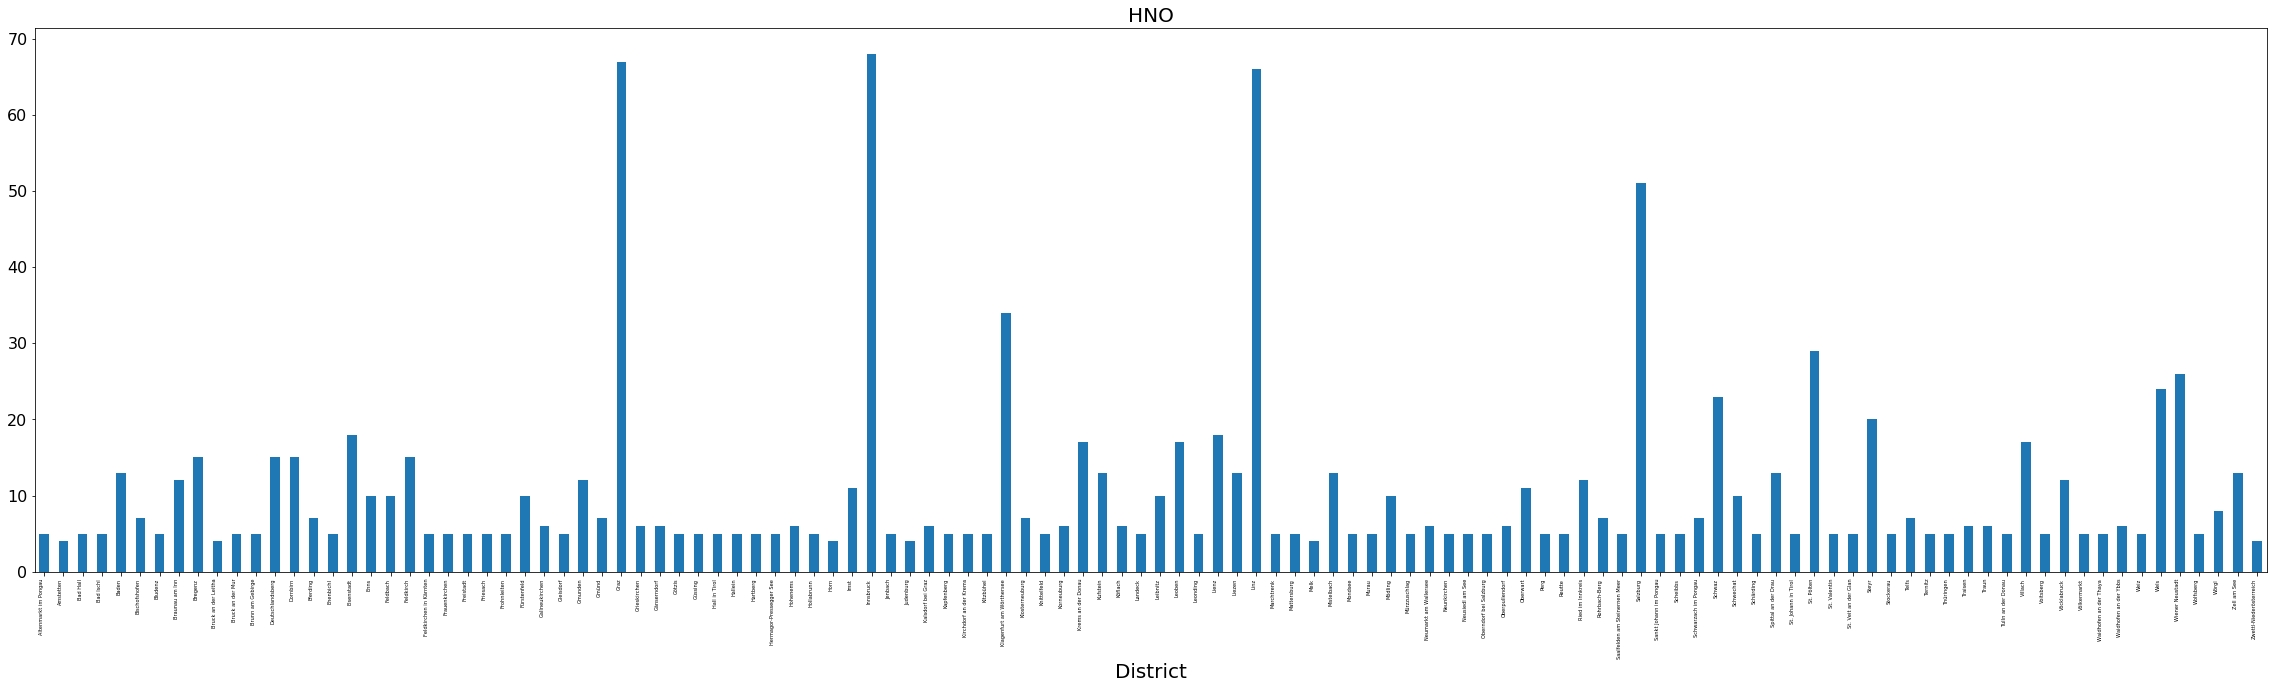

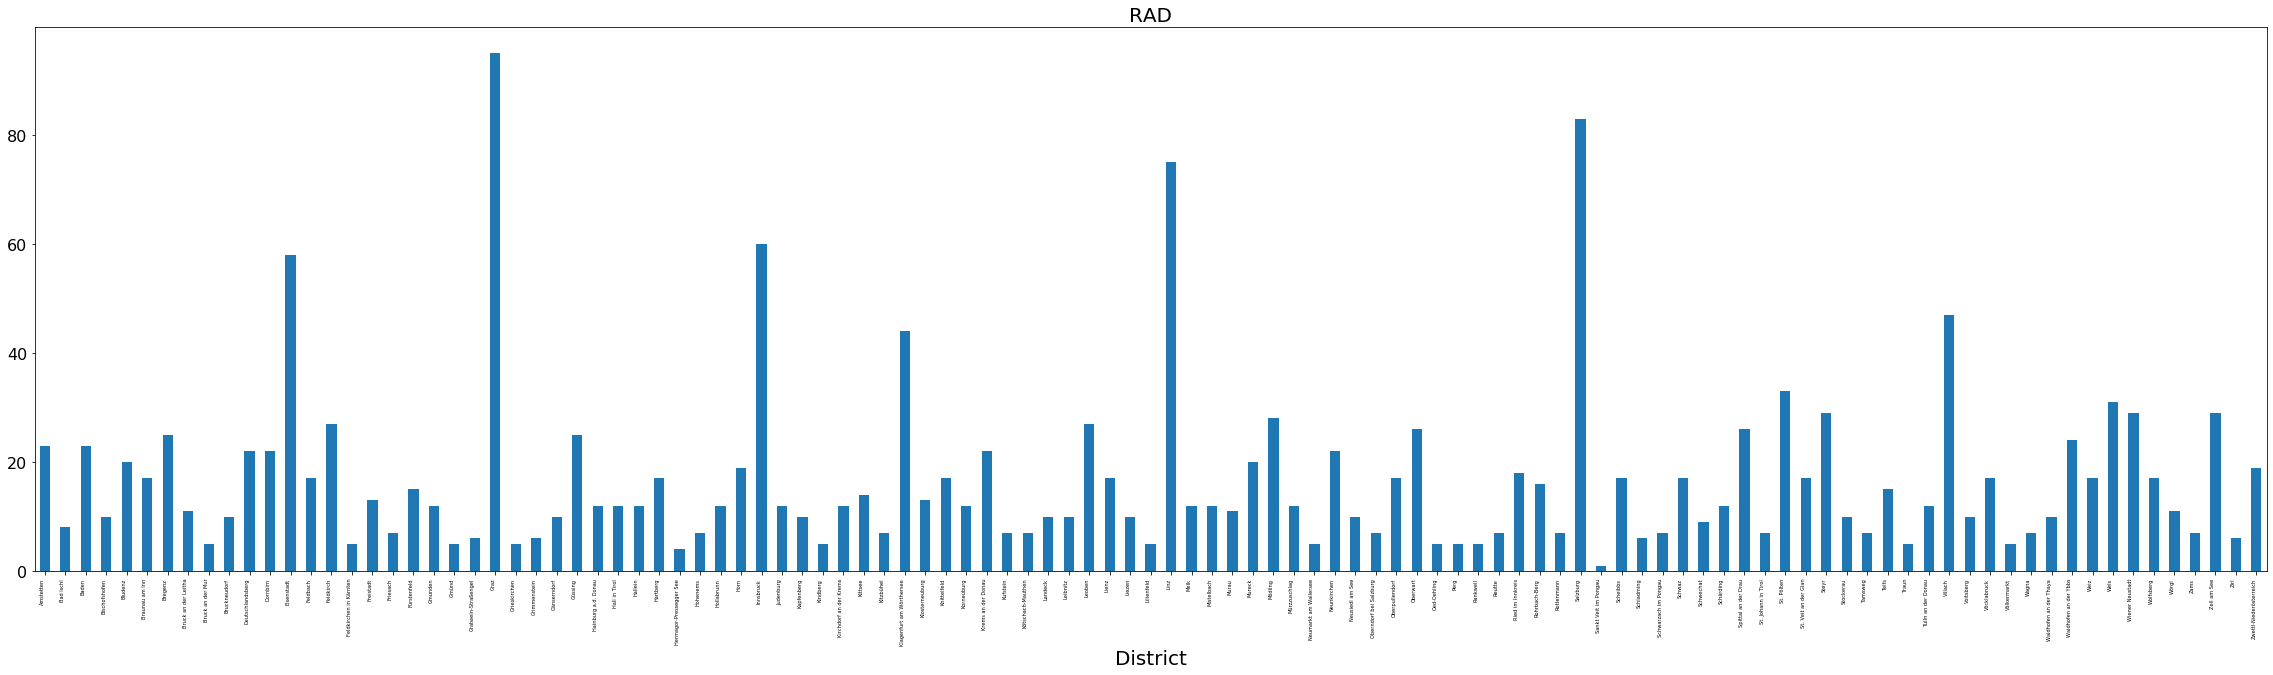

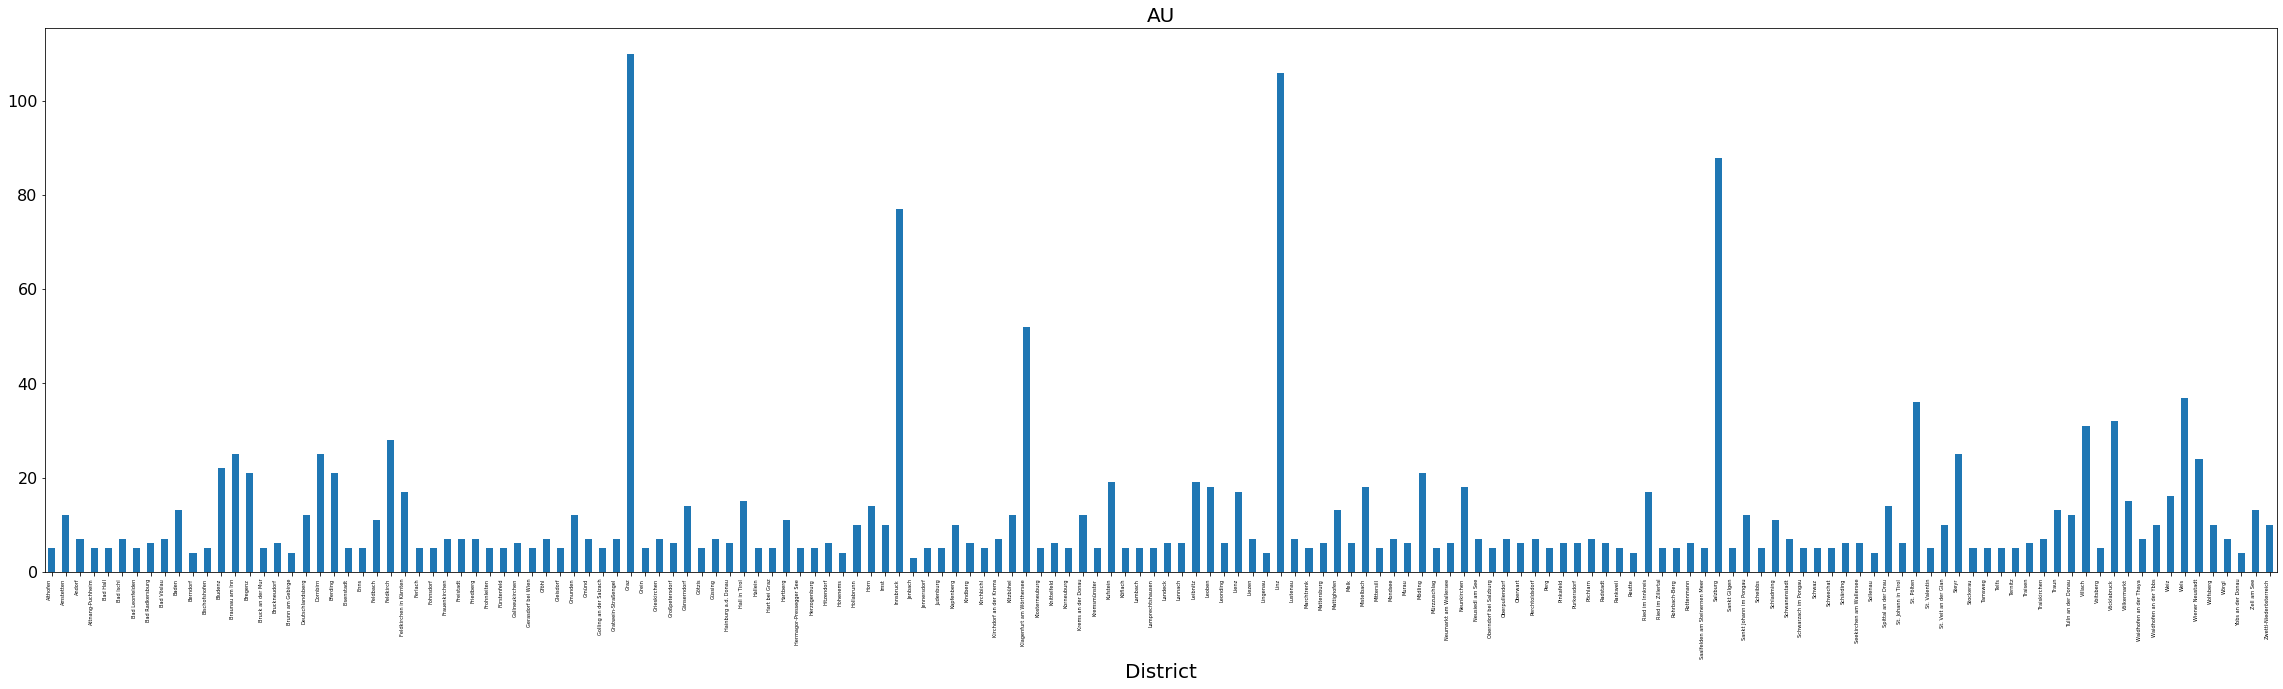

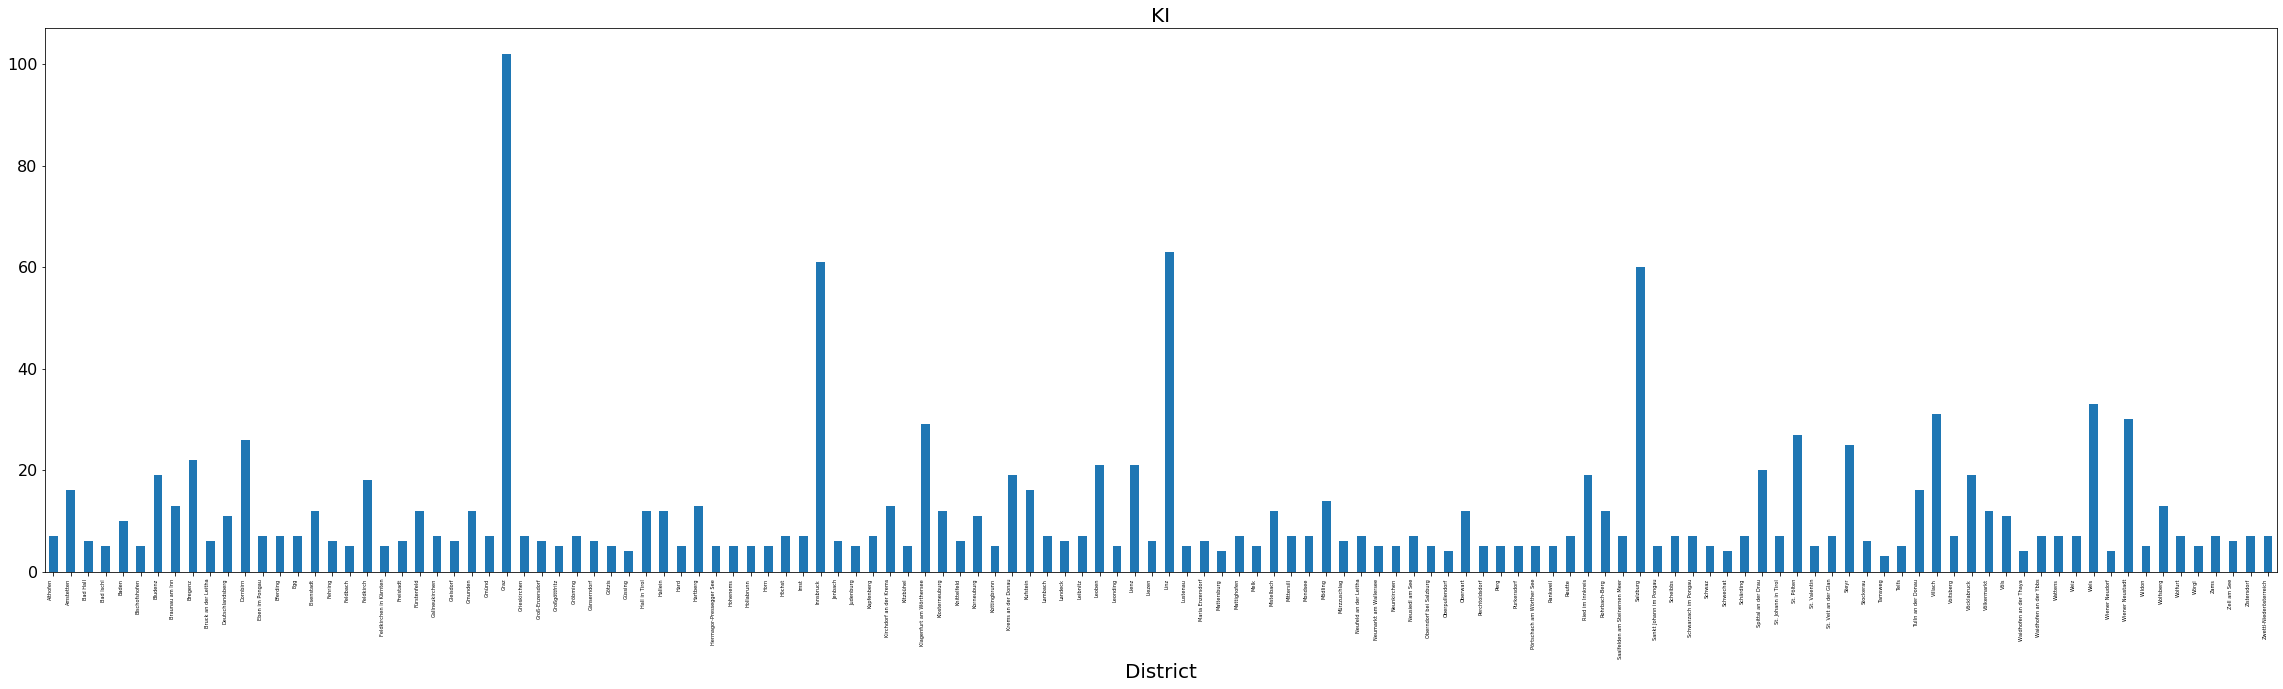

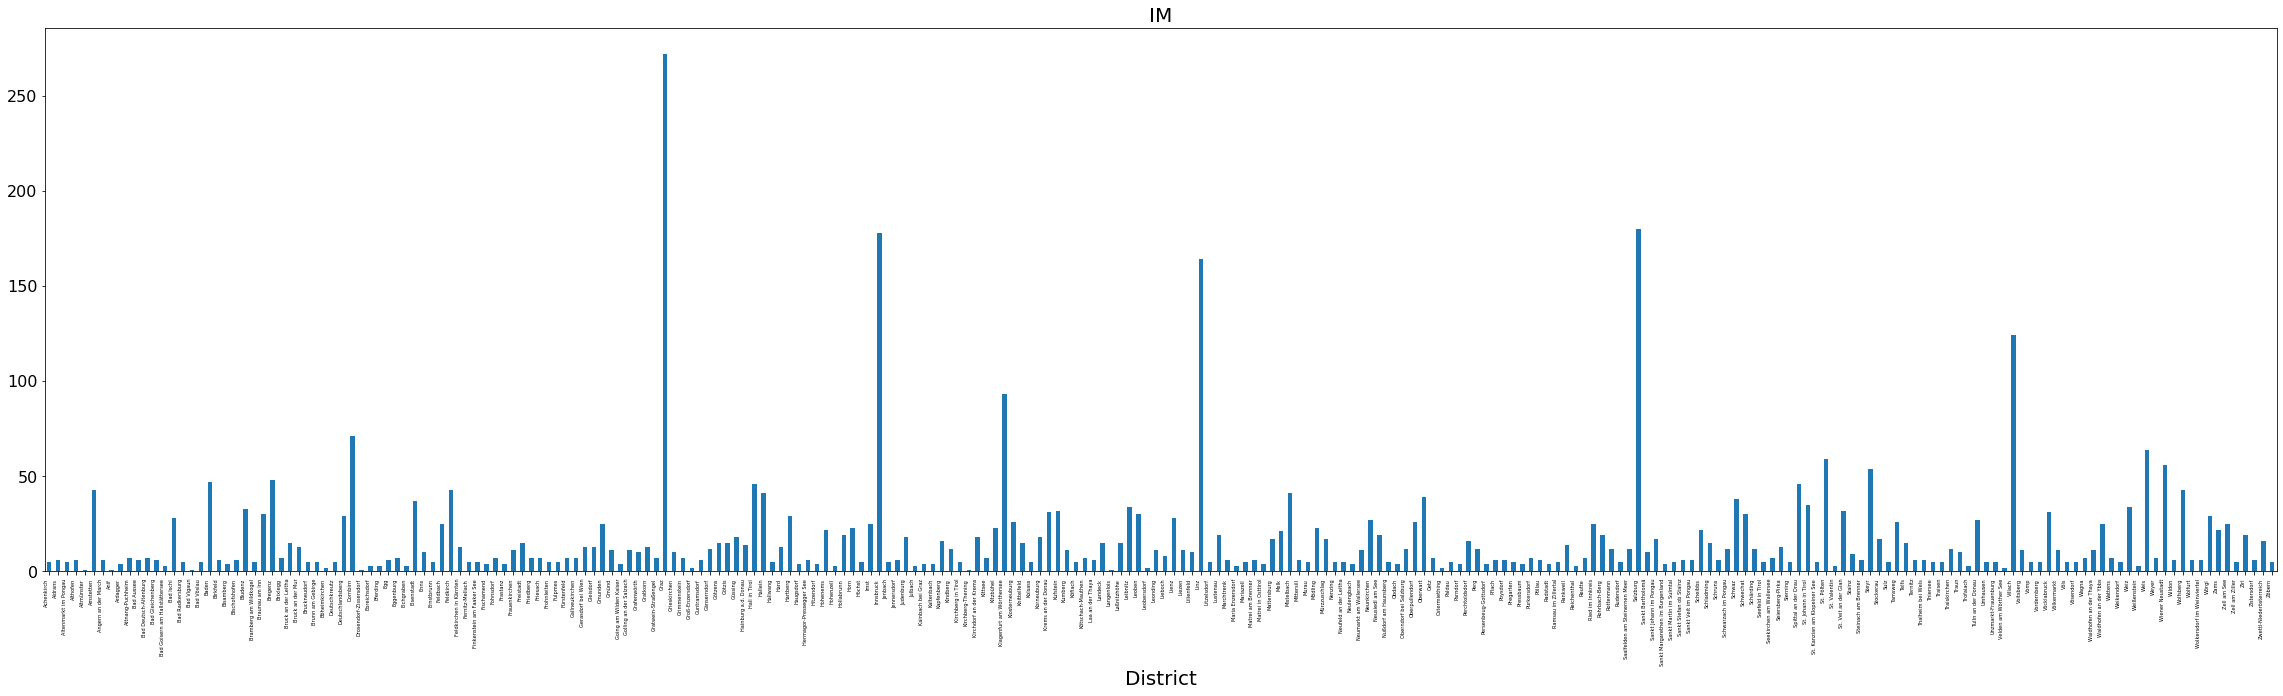

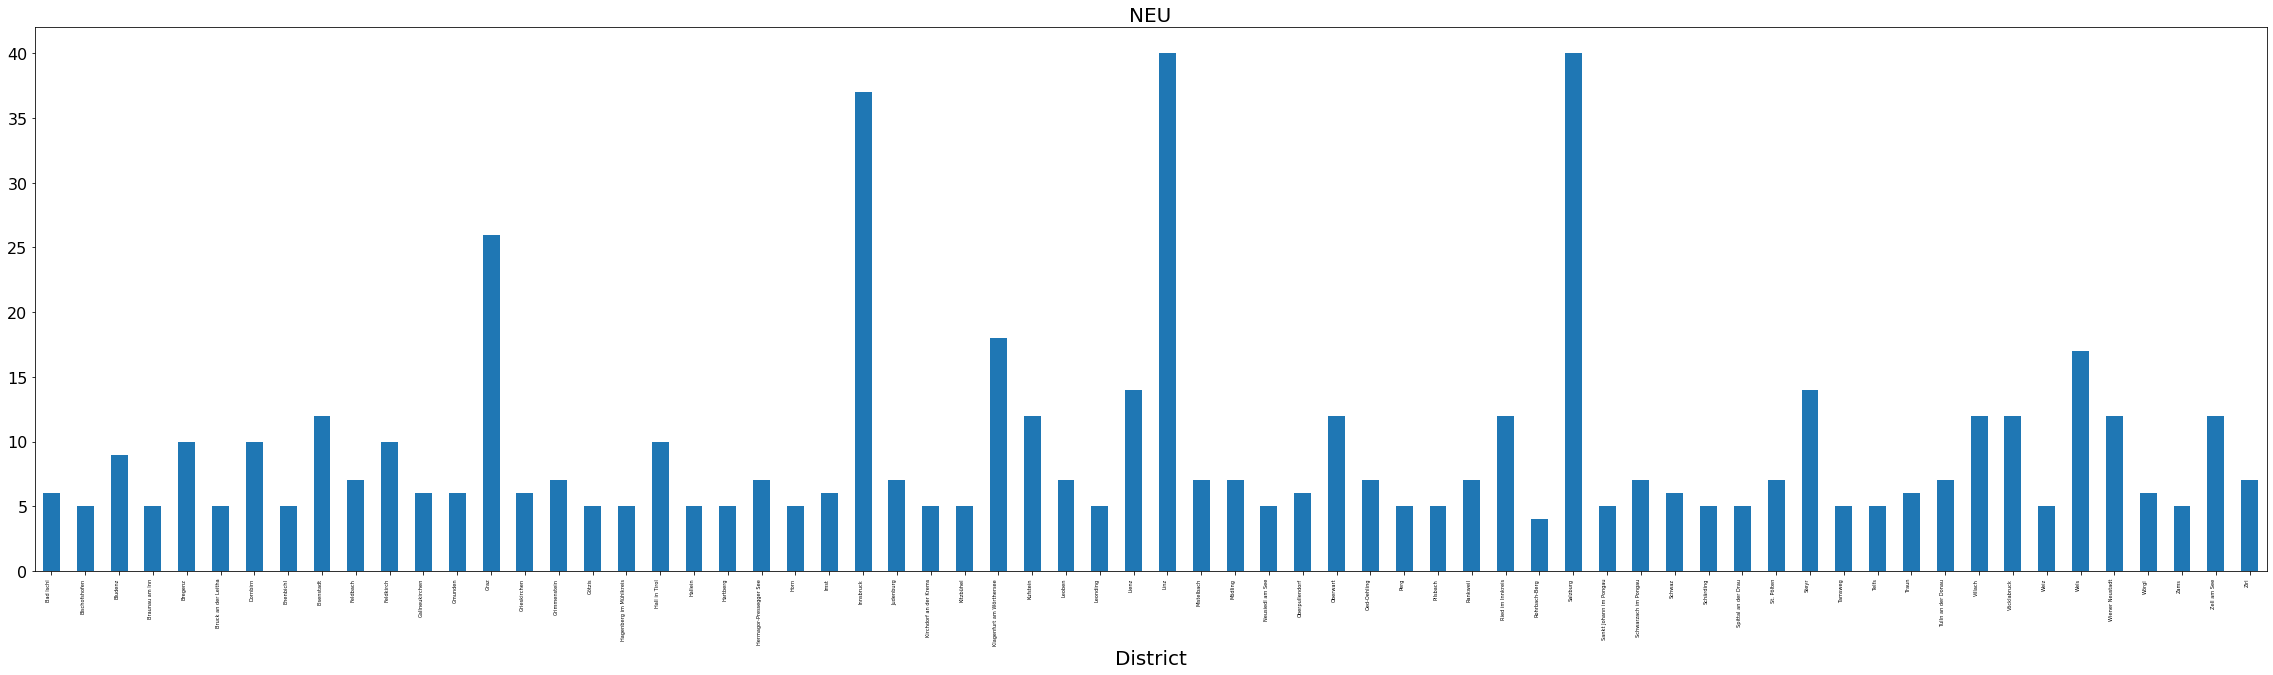

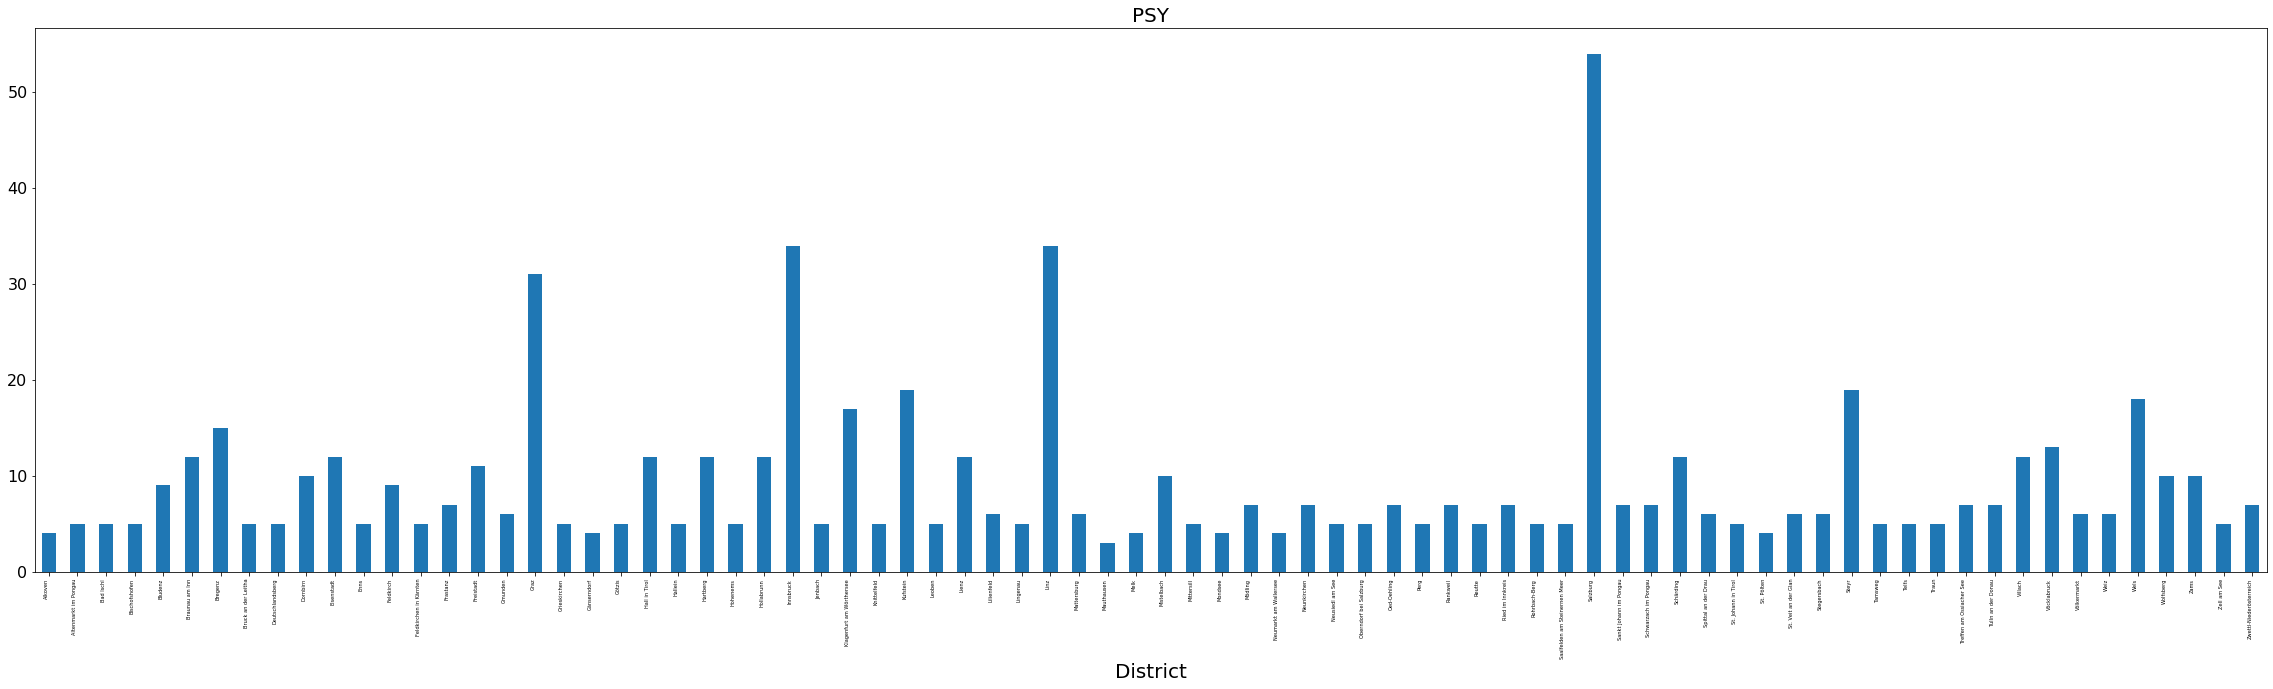

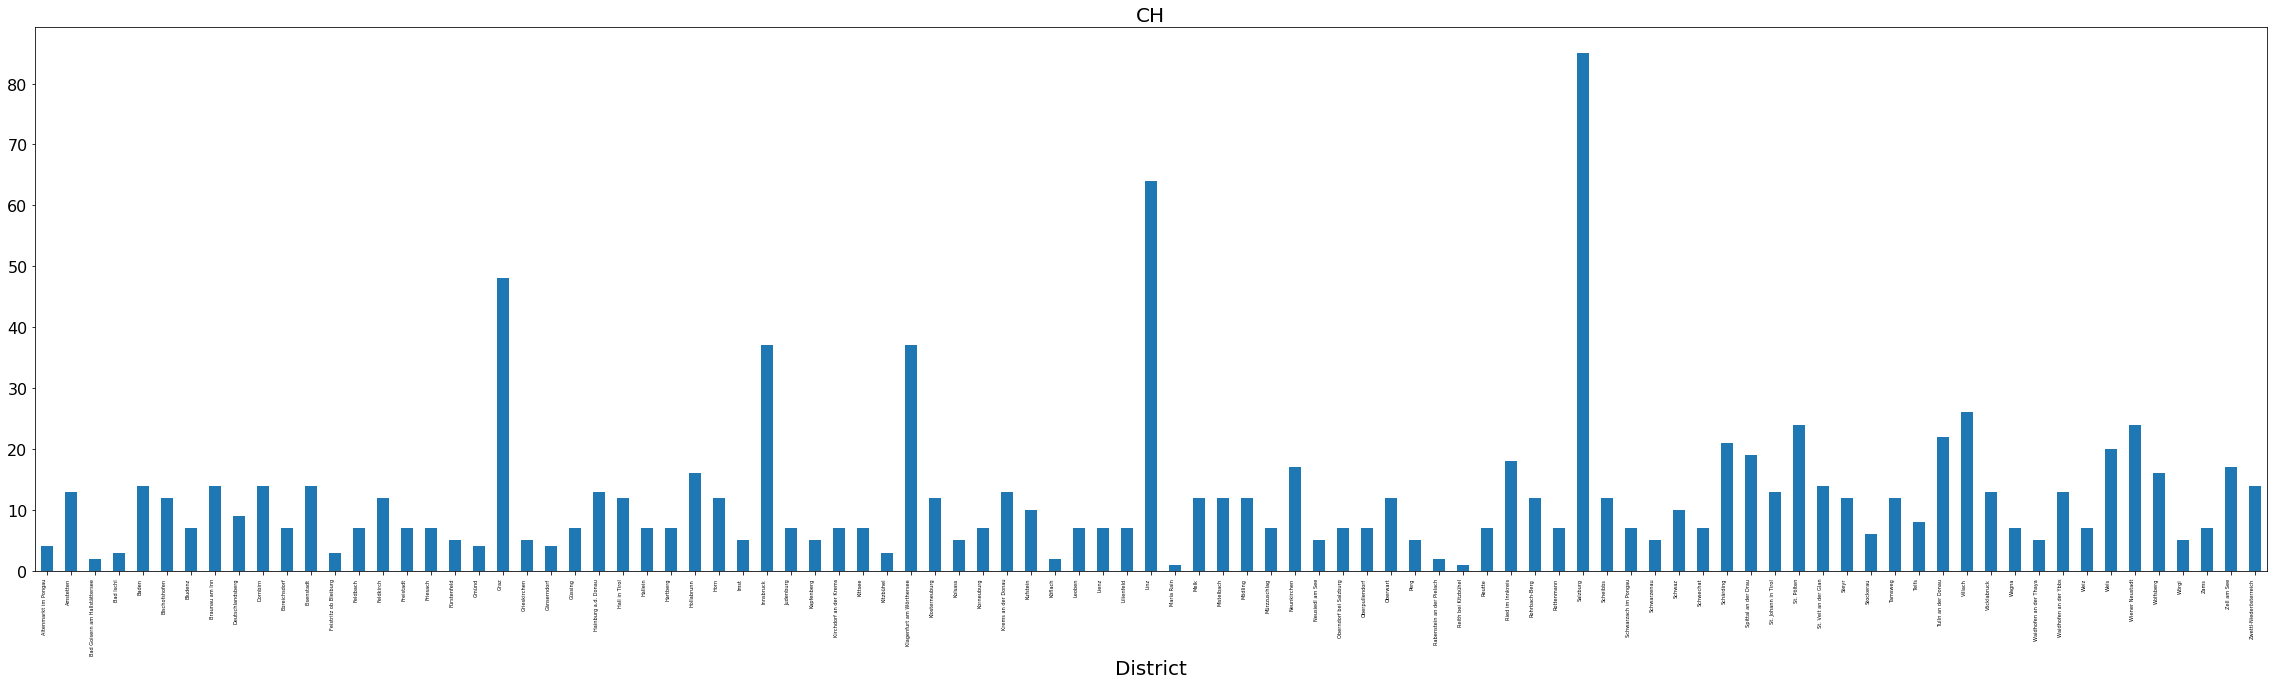

In [72]:
for spec in Specialization_dataframe_dic.keys():
    fig, ax = plt.subplots(figsize=(40,10))
    Specialization_dataframe_dic[spec].groupby('Gemeindename').count()['Leistungserbringer_ID'].plot(kind='bar', ax=ax)
    labels = ax.get_xticklabels()
    ax.set_xticklabels(labels, rotation=90, ha='right', fontsize = 5)
    ax.set_title(spec)
    ax.set_xlabel('District')
    plt.show()

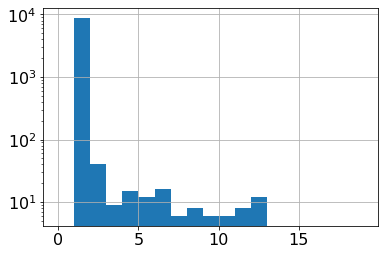

In [14]:
ax = Doctors_pats.groupby(['Leistungserbringer_ID', 'Fachgebietsgruppe']).mean().reset_index().groupby('Leistungserbringer_ID').count()['Fachgebietsgruppe'].hist(bins=np.arange(20))
ax.set_yscale('log')